## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial.distance import cdist
from sklearn import model_selection
from sklearn import metrics
import matplotlib.cm as cm
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint as sp_randint
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from datetime import datetime
from scipy.stats import pearsonr
import time
from matplotlib.ticker import StrMethodFormatter
import pprint
my_random_state = 10
%matplotlib inline

## Meets & Greet data !!!!!!!

In [2]:
concrete = pd.read_csv('C:\\Users\\Ah0183909\\Downloads\\concrete.csv')

In [3]:
concrete.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [4]:
concrete.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
concrete.shape

(1030, 9)

In [6]:
concrete.isnull().values.any()

False

In [7]:
concrete.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### AGE & STREGTH features have association. AGE has long right tail along with many outliers

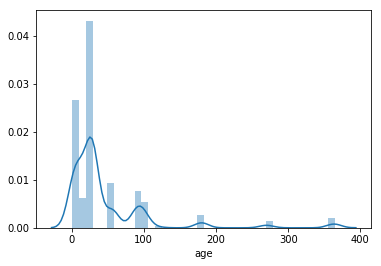

In [8]:
sns.distplot(concrete["age"])

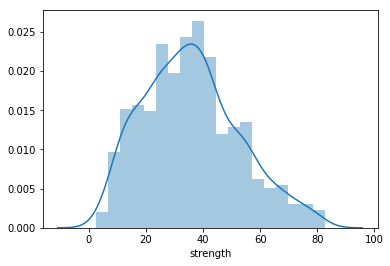

In [9]:
sns.distplot(concrete["strength"])

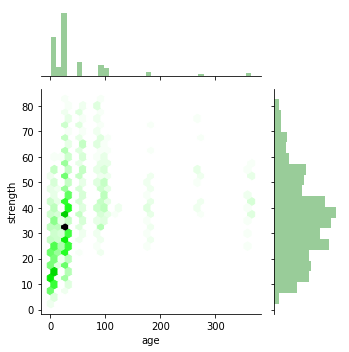

In [10]:
sns.jointplot(x="age",y="strength",data=concrete,height=5, ratio=3, color="g",kind="hex")

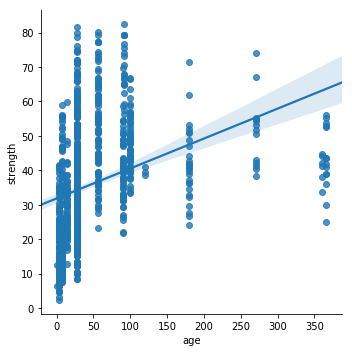

In [11]:
sns.lmplot(x="age",y="strength",data=concrete)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD52198>,
      dtype=object)

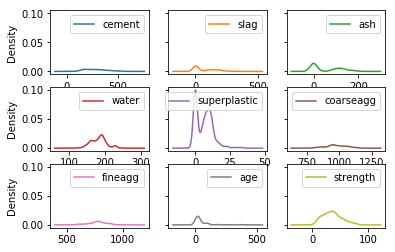

In [12]:
dataset = concrete.values
dataset
concrete.plot(kind='density', subplots=True, layout=(3,3), sharex=False, sharey=True)

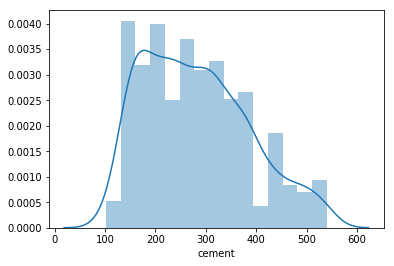

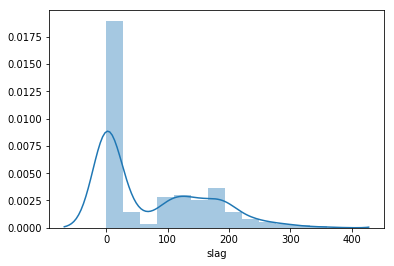

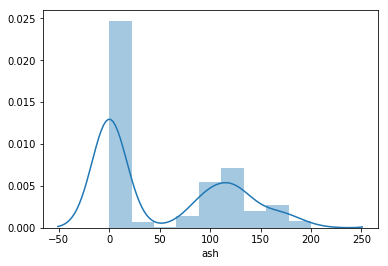

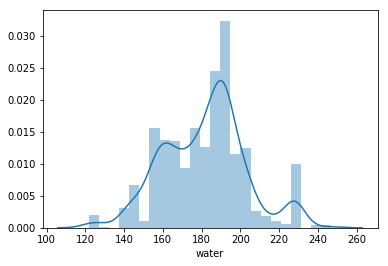

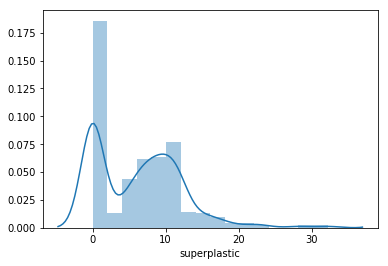

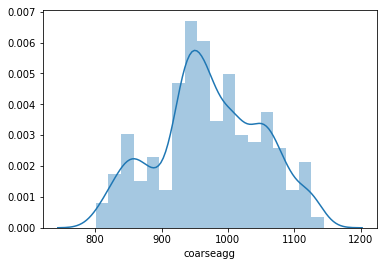

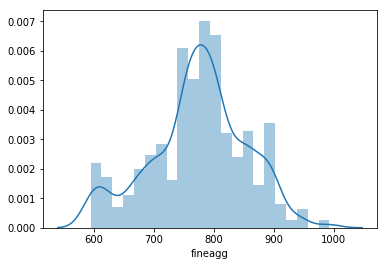

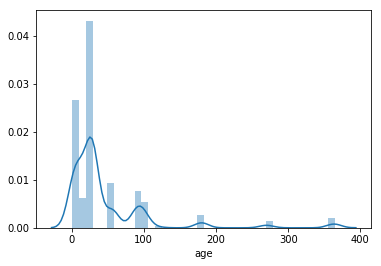

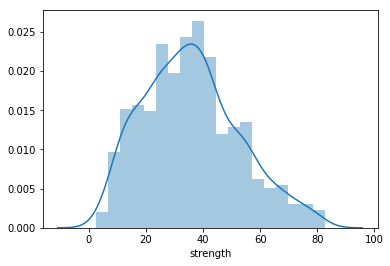

In [13]:
for i in concrete.columns:
    sns.distplot(concrete[i])
    plt.show()

### STRENGTH & CEMENT has .49 correlation effect with UPWARD association
### AGE is showing possibility of 5~6 clusters

In [14]:
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


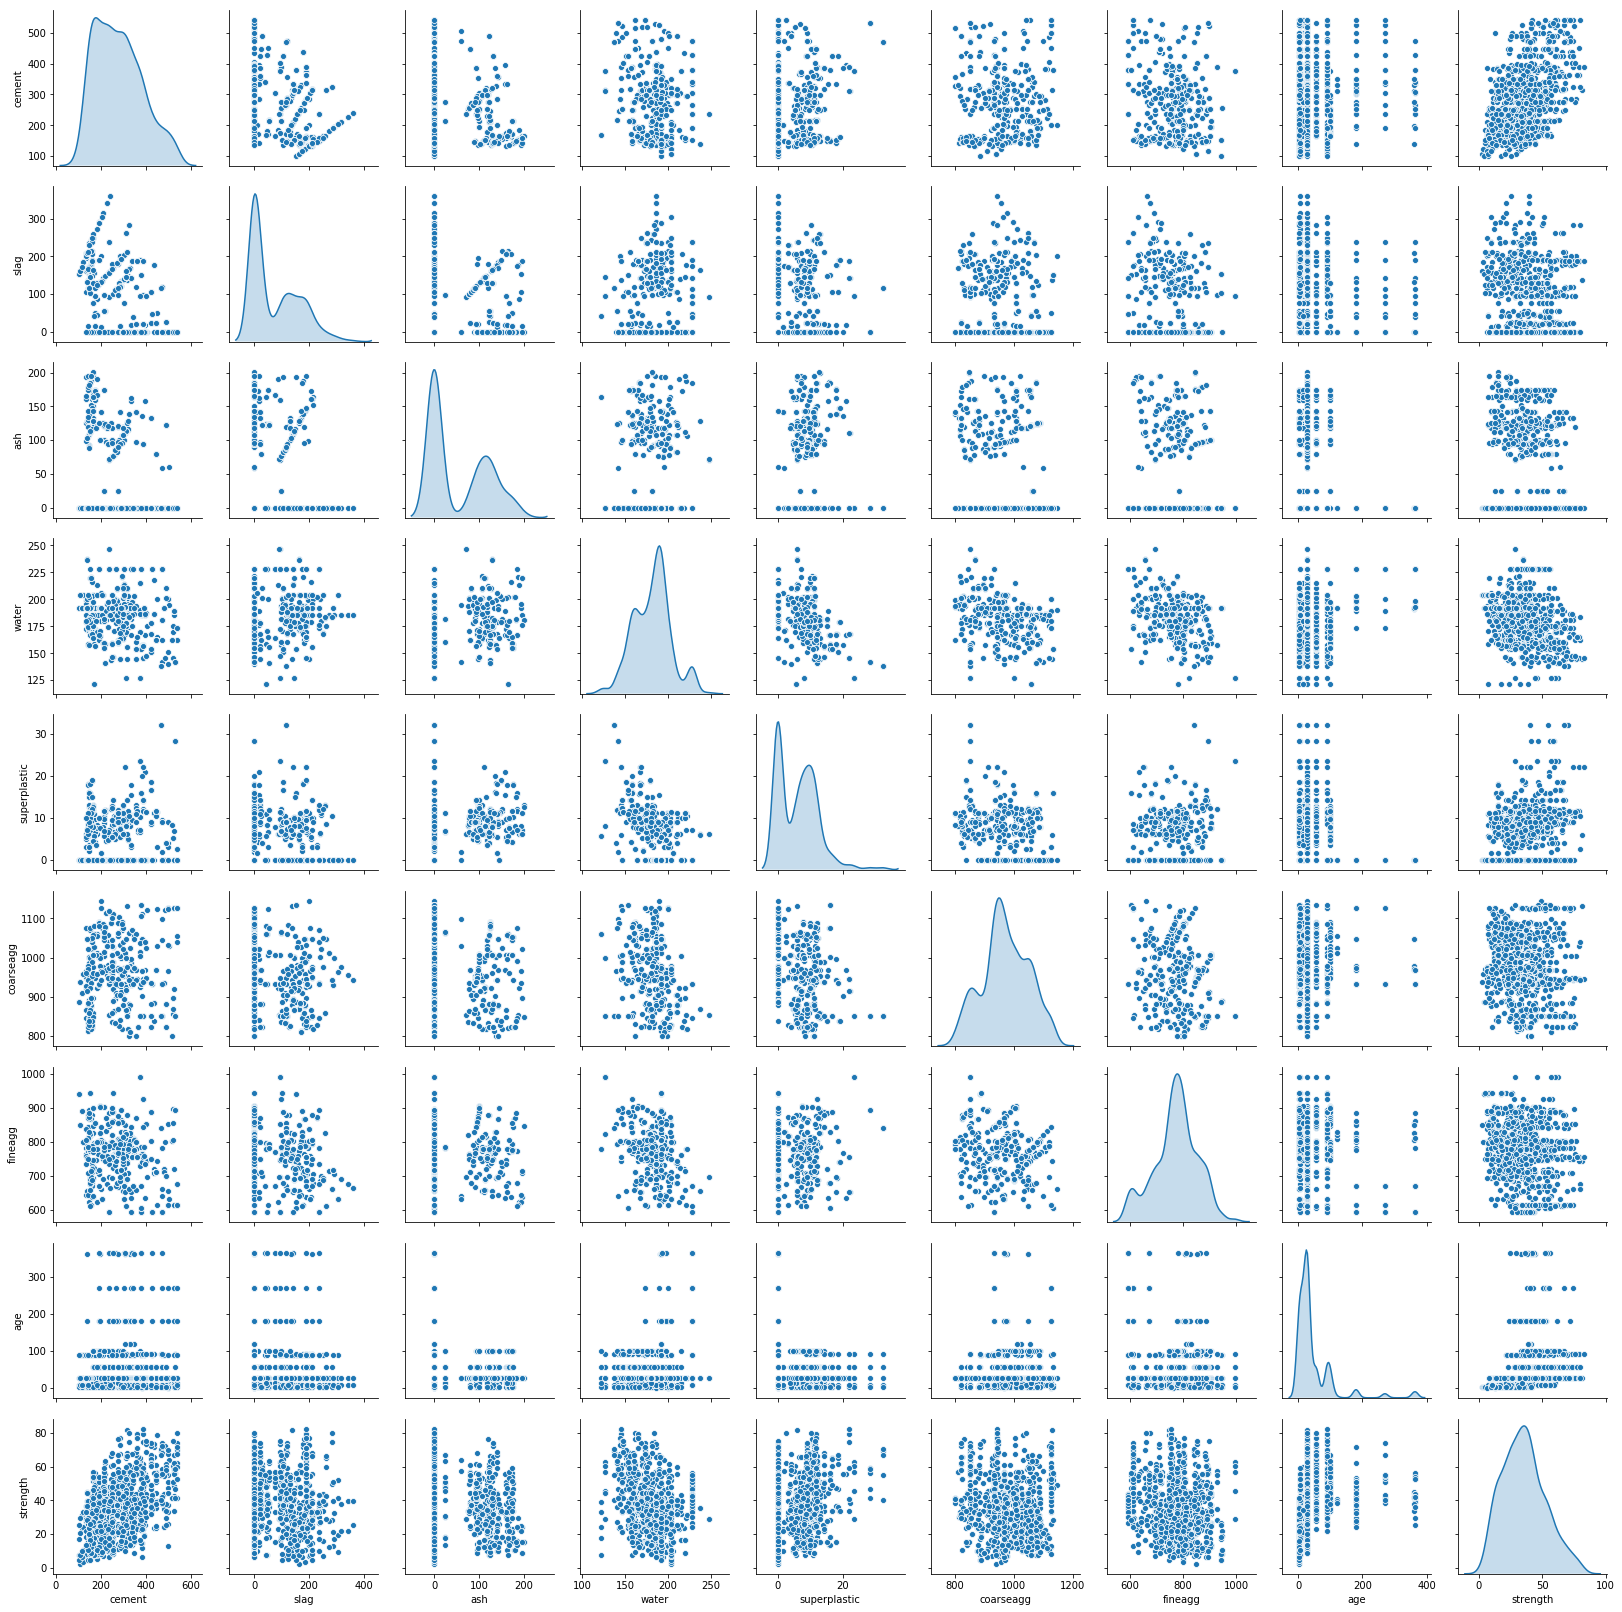

In [15]:
sns.pairplot(concrete,diag_kind='kde')

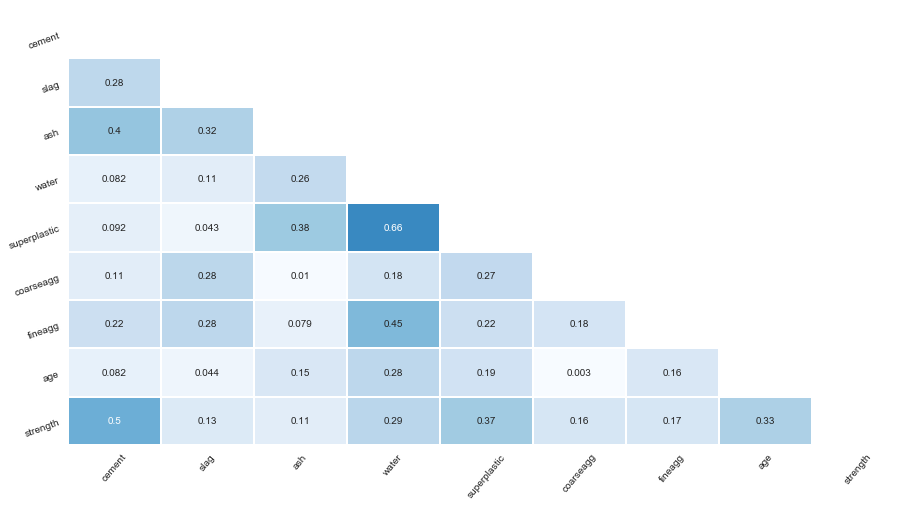

In [16]:
corr = abs(concrete.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

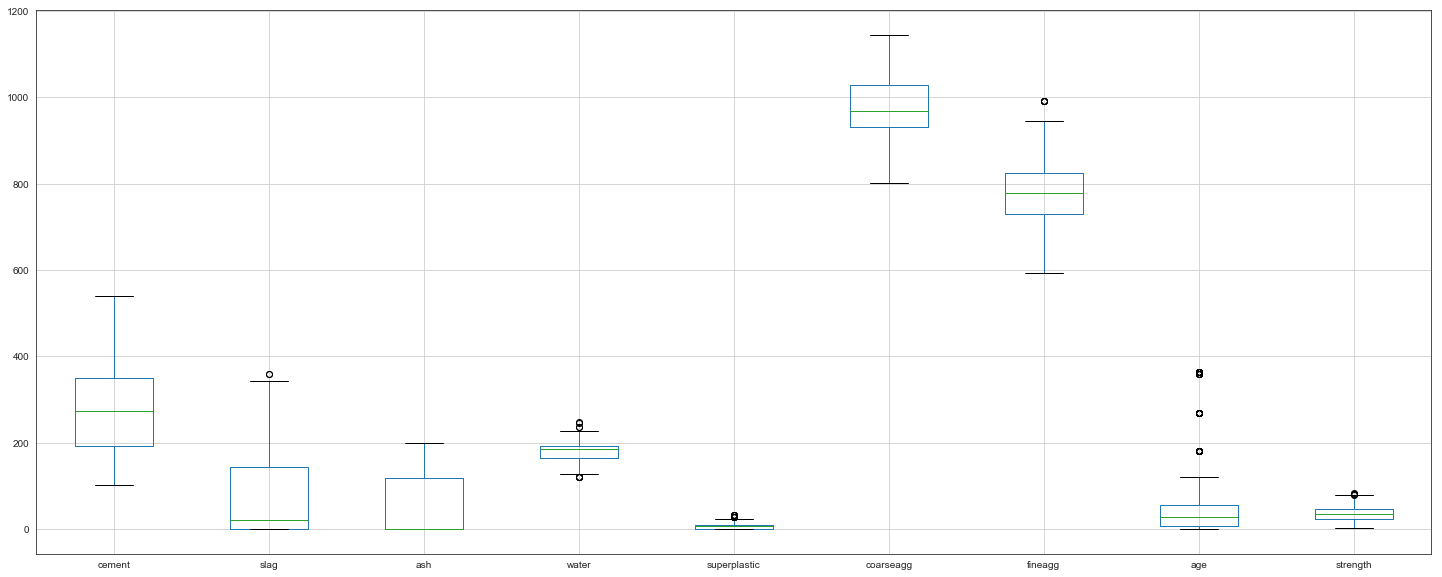

In [17]:
concrete.boxplot(figsize=(25,10))

### NO NaN / missing values found in CONCRETE dataset. As AGE column has maximum outliers I will try to fix them using UNSUPERVISED K-Means algorithim approach. In next few steps 2 functions are being created to align Outliers (> 3 Standard Deviation) in respective Cluster / GROUP

#### feature_name : this column is the original column of the dataset
#### keep_feature_name : this column is populate if colum value is <= 3*STD.Deviation (not an outlier)
#### outlier_feature_name : this is populated if column value is > 3*STD.Deviation (is an outlier)

In [18]:
def sepOutLierDF(dfname):
    """
    while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 
    These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold 
    of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will 
    be identified as outliers.
    """
    cols = dfname.columns
    newdf = pd.DataFrame()
    for i in cols:
        colName="keep_"+i
        outName="outLier_"+i
        newdf[i]=dfname[i]
        newdf[colName]=dfname[i][np.abs(dfname[i]-dfname[i].mean()) <= (3*dfname[i].std())]
        newdf[outName]=dfname[i][np.abs(dfname[i]-dfname[i].mean()) > (3*dfname[i].std())]
    return(newdf)

def outPerc(dfname):
    """
    Function outPerc will Print Outlier % in every feature on passed dataframe
    """
    col1_pos=0
    col2_pos=1
    col3_pos=2
    col_pos=[col1_pos,col2_pos,col3_pos]
    df_cols=(dfname.shape[1]/3)
    for j in np.arange(0,df_cols):
        k=0
        for i in dfname.iloc[:,col_pos]:
            if k==0:
                i_name=i
                i_org=dfname[i].count()
            elif k==1:
                i_woOL=dfname[i].count()
            elif k==2:
                i_wOL=dfname[i].count()
            k=k+1
        perc=((i_wOL/i_org)*100)
        print(i_name,' has ',round(perc,2),'% outliers (Total:',i_org,' Outliers:',i_wOL,')')
        col1_pos=col1_pos+3
        col2_pos=col2_pos+3
        col3_pos=col3_pos+3
        col_pos=[col1_pos,col2_pos,col3_pos]
    return j

In [19]:
help(sepOutLierDF)

Help on function sepOutLierDF in module __main__:

sepOutLierDF(dfname)
    while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. 
    These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold 
    of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will 
    be identified as outliers.



In [20]:
help(outPerc)

Help on function outPerc in module __main__:

outPerc(dfname)
    Function outPerc will Print Outlier % in every feature on passed dataframe



In [21]:
concreteSepOL = sepOutLierDF(concrete)
concreteSepOL.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
keep_cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
outLier_cement,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
keep_slag,1026.0,72.816472,84.691215,0.00,0.000,22.000,142.500,316.1
outLier_slag,4.0,350.750000,9.988160,342.10,342.100,350.750,359.400,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
keep_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
outLier_ash,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0


In [22]:
outPerc(concreteSepOL)

cement  has  0.0 % outliers (Total: 1030  Outliers: 0 )
slag  has  0.39 % outliers (Total: 1030  Outliers: 4 )
ash  has  0.0 % outliers (Total: 1030  Outliers: 0 )
water  has  0.19 % outliers (Total: 1030  Outliers: 2 )
superplastic  has  0.97 % outliers (Total: 1030  Outliers: 10 )
coarseagg  has  0.0 % outliers (Total: 1030  Outliers: 0 )
fineagg  has  0.0 % outliers (Total: 1030  Outliers: 0 )
age  has  3.2 % outliers (Total: 1030  Outliers: 33 )
strength  has  0.0 % outliers (Total: 1030  Outliers: 0 )


8.0

### AGE has reported max.33 outliers

In [23]:
print('min',concrete.age.min(),' median ',concrete.age.median(),' max ',concrete.age.max())

min 1  median  28.0  max  365


### I dont want to assign straight median=28 to all outliers in AGE feature. Lets explore further. But first thing first .. SCALE SCALE SCALE !!!!


In [24]:
X=concrete.iloc[:,:8] ## never scale depenedent column 
ZX=X.apply(zscore)

In [25]:
print('min',ZX.age.min(),' median ',ZX.age.median(),' max ',ZX.age.max())

min -0.7073594255895131  median  -0.27973311313256866  max  5.057676786792999


In [26]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28


In [27]:
ZX.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733


In [28]:
X.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [29]:
ZX.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

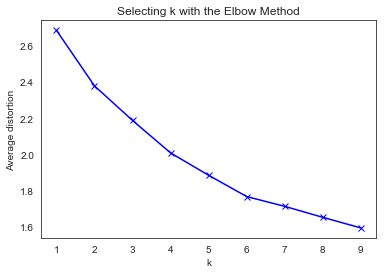

In [30]:
#Finding optimal no. of clusters :  ELBOW METHOD

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=my_random_state)
    model.fit(ZX)
    prediction=model.predict(ZX)
    meanDistortions.append(sum(np.min(cdist(ZX, model.cluster_centers_, 'euclidean'), axis=1)) / ZX.shape[0])

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [31]:
range_n_clusters = list (range(2,10))
for n_clusters in range_n_clusters:
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(ZX)
    centers = clusterer.cluster_centers_
    score = silhouette_score (ZX, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.204398781142096)
For n_clusters = 3, silhouette score is 0.2202954817512766)
For n_clusters = 4, silhouette score is 0.2476301375151331)
For n_clusters = 5, silhouette score is 0.2654651780435785)
For n_clusters = 6, silhouette score is 0.28578052602203574)
For n_clusters = 7, silhouette score is 0.2838076200870543)
For n_clusters = 8, silhouette score is 0.28289274949225945)
For n_clusters = 9, silhouette score is 0.28598691645689833)


For n_clusters = 2 The average silhouette_score is : 0.204398781142096
For n_clusters = 3 The average silhouette_score is : 0.2202954817512766
For n_clusters = 4 The average silhouette_score is : 0.2476301375151331
For n_clusters = 5 The average silhouette_score is : 0.2652063675558596
For n_clusters = 6 The average silhouette_score is : 0.2856983747046716
For n_clusters = 7 The average silhouette_score is : 0.2838770524021259
For n_clusters = 8 The average silhouette_score is : 0.2809872062368806
For n_clusters = 9 The average silhouette_score is : 0.25344835192246734


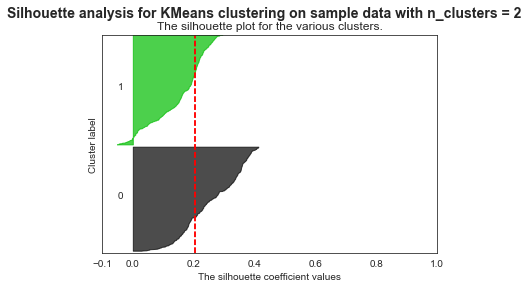

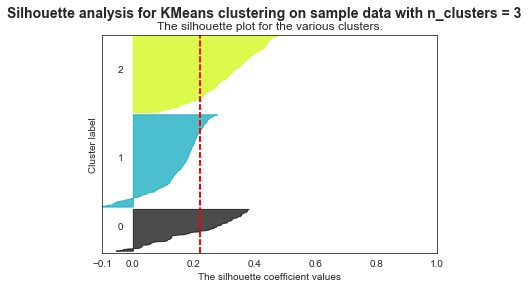

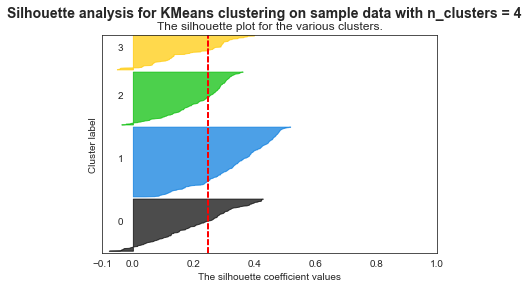

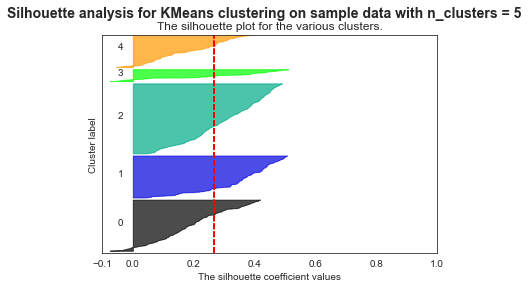

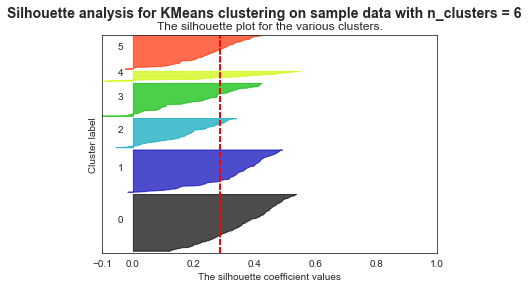

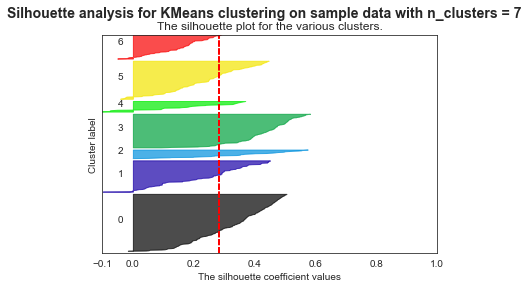

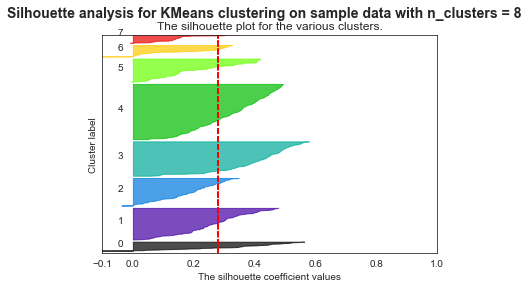

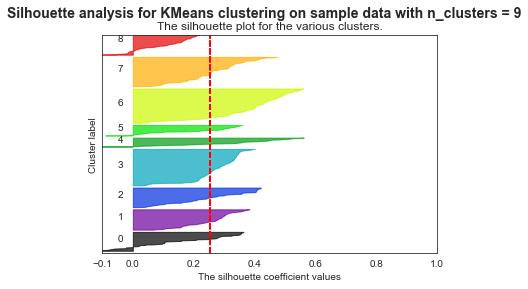

In [32]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

for n_clusters in range_n_clusters:
    fig = plt.figure()  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xlim([-0.1, 1])
    ax.set_ylim([0, len(ZX) + (n_clusters + 1) * 5])
    clusterer = KMeans(n_clusters=n_clusters, random_state=my_random_state)
    cluster_labels = clusterer.fit_predict(ZX)
    silhouette_avg = silhouette_score(ZX, cluster_labels, metric='euclidean')
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(ZX, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples
        ax.set_title("The silhouette plot for the various clusters.")
        ax.set_xlabel("The silhouette coefficient values")
        ax.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

#### Best Scores
#### For n_clusters = 6 AND silhouette score is 0.2856983747046716

In [33]:
ZX.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

In [34]:
kmeans=KMeans(n_clusters=6, random_state=my_random_state)
kmeans.fit(ZX)
pred=kmeans.predict(ZX)
pred

array([5, 0, 0, ..., 2, 4, 1])

### PRED has cluster values. Lets add this column to X & ZX 

In [35]:
ZX["GROUP"] = pred
X["GROUP"] = pred

In [36]:
ZX.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,GROUP
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,5
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,0
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,0
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,5
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,5


### CLUSTER wise exploration

In [37]:
ZXClust = ZX.groupby(["GROUP"])
ZXClust.age.describe().T

GROUP,0,1,2,3,4,5
count,279.000000,208.000000,144.000000,162.000000,49.000000,188.000000
mean,-0.112100,-0.161253,-0.291612,-0.197219,3.692052,-0.224216
std,0.524691,0.658341,0.139028,0.450268,1.253724,0.506924
min,-0.675683,-0.707359,-0.675683,-0.675683,2.127645,-0.675683
25%,-0.501465,-0.612331,-0.279733,-0.612331,2.127645,-0.612331
50%,-0.279733,-0.279733,-0.279733,-0.279733,3.553066,-0.279733
75%,0.163731,-0.279733,-0.279733,0.163731,5.057677,-0.279733
max,0.860604,2.127645,0.163731,0.718062,5.057677,2.127645


0    AxesSubplot(0.1,0.792857;0.8x0.107143)
1    AxesSubplot(0.1,0.664286;0.8x0.107143)
2    AxesSubplot(0.1,0.535714;0.8x0.107143)
3    AxesSubplot(0.1,0.407143;0.8x0.107143)
4    AxesSubplot(0.1,0.278571;0.8x0.107143)
5        AxesSubplot(0.1,0.15;0.8x0.107143)
dtype: object

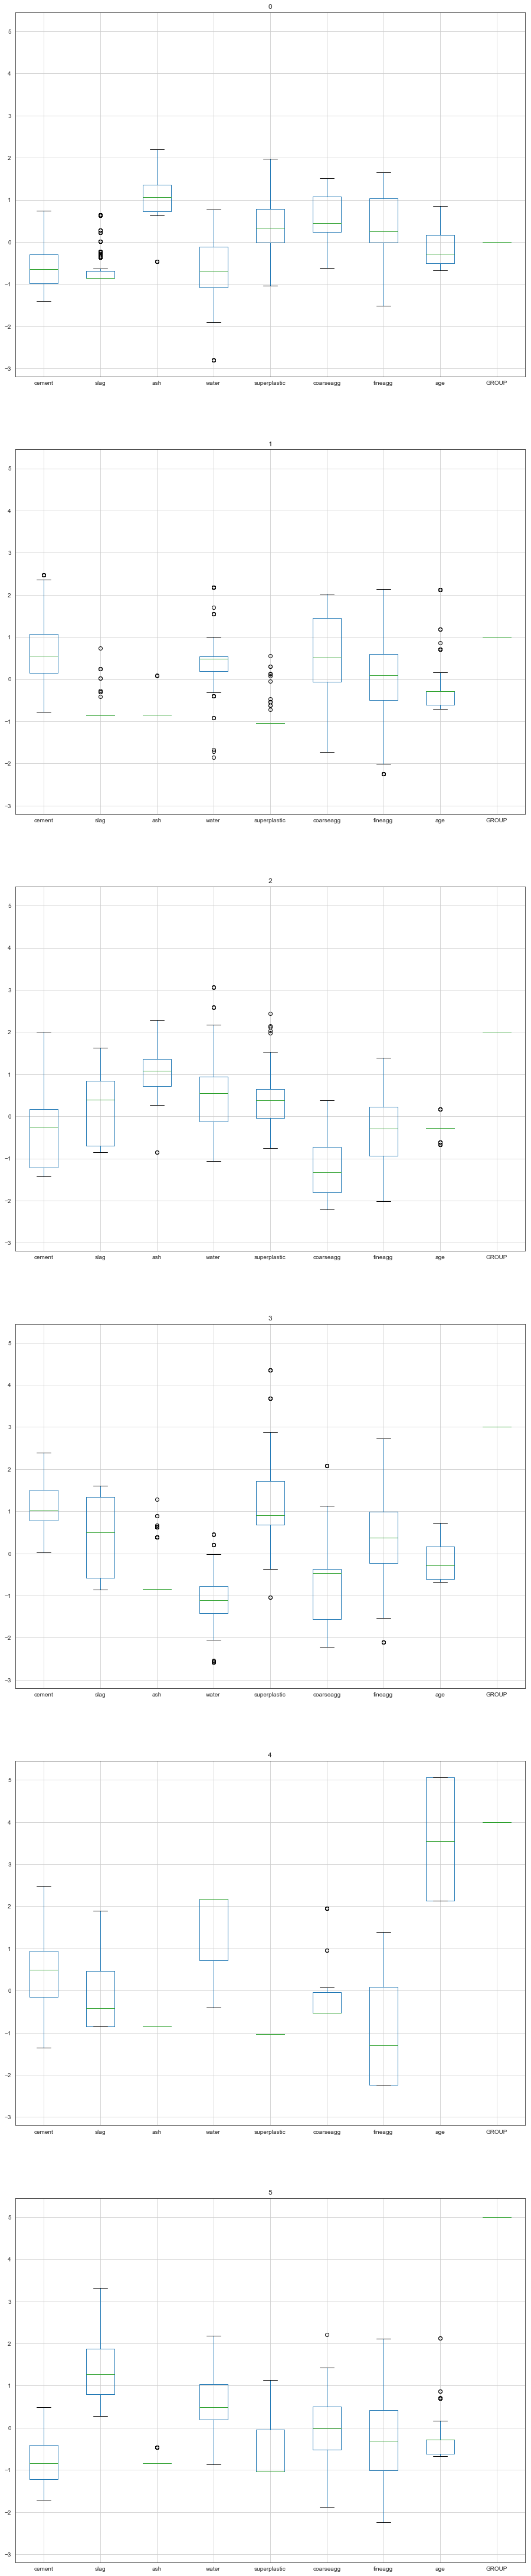

In [38]:
ZXClust.boxplot(layout =(6,1),figsize=(15,80))

In [39]:
ZXClust = X.groupby(['GROUP'])
ZXClust.count()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
GROUP,,,,,,,,
0,279,279,279,279,279,279,279,279
1,208,208,208,208,208,208,208,208
2,144,144,144,144,144,144,144,144
3,162,162,162,162,162,162,162,162
4,49,49,49,49,49,49,49,49
5,188,188,188,188,188,188,188,188


In [40]:
ZXClust.describe().T

GROUP                         0            1            2            3  \
cement       count   279.000000   208.000000   144.000000   162.000000   
             mean    219.741935   355.082692   246.462500   395.890741   
             std      48.917800    83.973773   102.021977    61.004563   
             min     134.700000   200.000000   132.000000   284.000000   
             25%     178.000000   296.000000   153.475000   362.600000   
             50%     213.700000   339.000000   255.150000   387.000000   
             75%     250.700000   393.000000   298.600000   439.000000   
             max     359.000000   540.000000   491.000000   531.300000   
slag         count   279.000000   208.000000   144.000000   162.000000   
             mean     17.801075     3.867788    89.879167   113.900617   
             std      35.829523    17.719924    72.045565    69.469993   
             min       0.000000     0.000000     0.000000     0.000000   
             25%       0.000000     0.000000    14.000000    24.000000   
             50%       0.000000     0.000000   107.800000   117.200000   
             75%      14.300000     0.000000   146.200000   189.000000   
             max     129.900000   137.000000   214.000000   212.500000   
ash          count   279.000000   208.000000   144.000000   162.000000   
             mean    125.495341     0.572115   122.573611    17.198765   
             std      29.605572     5.820553    34.399199    35.899034   
             min      24.500000     0.000000     0.000000     0.000000   
             25%     100.450000     0.000000   100.000000     0.000000   
             50%     121.900000     0.000000   123.000000     0.000000   
             75%     141.000000     0.000000   141.000000     0.000000   
             max     195.000000    60.000000   200.100000   136.000000   
water        count   279.000000   208.000000   144.000000   162.000000   
             mean    168.118638   191.788462   192.945833   158.719753   
             std      15.391194    13.505700    16.748297    13.654412   
             min     121.800000   142.000000   159.000000   126.600000   
             25%     158.500000   185.700000   179.000000   151.400000   
             50%     166.600000   192.000000   193.150000   157.900000   
...                         ...          ...          ...          ...   
superplastic std       3.115918     1.432523     3.306895     6.005623   
             min       0.000000     0.000000     1.700000     0.000000   
             25%       6.100000     0.000000     6.000000    10.300000   
             50%       8.200000     0.000000     8.500000    11.600000   
             75%      10.900000     0.000000    10.025000    16.500000   
             max      18.000000     9.500000    20.800000    32.200000   
coarseagg    count   279.000000   208.000000   144.000000   162.000000   
             mean   1018.778853  1019.343269   877.243056   920.252469   
             std      43.600317    71.424322    49.164261    64.514777   
             min     925.000000   838.400000   801.000000   801.000000   
             25%     991.600000   968.000000   833.000000   852.100000   
             50%    1007.800000  1013.100000   870.050000   937.000000   
             75%    1056.400000  1085.750000   916.750000   944.700000   
             max    1090.000000  1130.000000  1002.000000  1134.300000   
fineagg      count   279.000000   208.000000   144.000000   162.000000   
             mean    806.583513   766.182692   745.853472   801.503086   
             std      54.423761    82.355501    64.070299    80.618719   
             min     652.000000   594.000000   612.000000   605.000000   
             25%     771.950000   734.225000   699.000000   755.800000   
             50%     793.500000   781.000000   750.000000   803.700000   
             75%     856.800000   821.000000   792.125000   852.775000   
             max     905.900000   945.000000   884.300000   992.600000   
age 

In [41]:
ZXClust.count()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
GROUP,,,,,,,,
0,279,279,279,279,279,279,279,279
1,208,208,208,208,208,208,208,208
2,144,144,144,144,144,144,144,144
3,162,162,162,162,162,162,162,162
4,49,49,49,49,49,49,49,49
5,188,188,188,188,188,188,188,188


In [42]:
ZX.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,GROUP
0,-1.339017,1.601441,-0.847144,1.027590,-1.039143,-0.014398,-0.312970,-0.279733,5
1,-1.074790,-0.367541,1.096078,-1.090116,0.769617,1.388141,0.282260,-0.501465,0
2,-0.298384,-0.856888,0.648965,0.273274,-0.118015,-0.206121,1.093371,-0.279733,0
3,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,-0.279733,5
4,-1.209776,1.269798,-0.847144,0.549700,0.484905,0.958372,-0.959363,-0.279733,5


## FINALLY lets separate outliers GROUP wise so that MEAN of specific GROUP is assigned to respective feature only
### I am going to focus on AGE feature as it has got max. outliers

#### Group 1, 2 & 5 have reported outliers in AGE column. Lets get more into these clusters

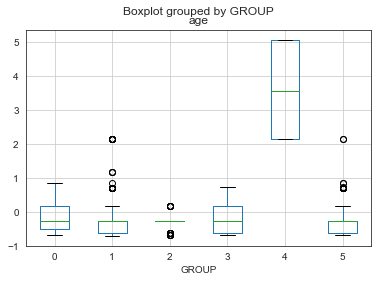

In [43]:
ZX.boxplot(by="GROUP",column="age")#,layout =(6,1),figsize=(15,80))

In [44]:
#### Dataset for individual clusters
ZXClust0=ZXClust.get_group(0)
ZXClust1=ZXClust.get_group(1)
ZXClust2=ZXClust.get_group(2)
ZXClust3=ZXClust.get_group(3)
ZXClust4=ZXClust.get_group(4)
ZXClust5=ZXClust.get_group(5)
ZXClust3.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,162.0,395.890741,61.004563,284.0,362.6,387.0,439.000,531.3
slag,162.0,113.900617,69.469993,0.0,24.0,117.2,189.000,212.5
ash,162.0,17.198765,35.899034,0.0,0.0,0.0,0.000,136.0
water,162.0,158.719753,13.654412,126.6,151.4,157.9,164.900,191.3
superplastic,162.0,13.728395,6.005623,0.0,10.3,11.6,16.500,32.2
coarseagg,162.0,920.252469,64.514777,801.0,852.1,937.0,944.700,1134.3
fineagg,162.0,801.503086,80.618719,605.0,755.8,803.7,852.775,992.6
age,162.0,33.209877,28.429587,3.0,7.0,28.0,56.000,91.0
GROUP,162.0,3.000000,0.000000,3.0,3.0,3.0,3.000,3.0


In [45]:
## function sepOutLierDF will add 2 separate columns : Non-Outlier & Outlier 
ZXOut0=sepOutLierDF(ZXClust0)
ZXOut1=sepOutLierDF(ZXClust1)
ZXOut2=sepOutLierDF(ZXClust2)
ZXOut3=sepOutLierDF(ZXClust3)
ZXOut4=sepOutLierDF(ZXClust4)
ZXOut5=sepOutLierDF(ZXClust5)

In [46]:
ZXOut0.columns

Index(['cement', 'keep_cement', 'outLier_cement', 'slag', 'keep_slag',
       'outLier_slag', 'ash', 'keep_ash', 'outLier_ash', 'water', 'keep_water',
       'outLier_water', 'superplastic', 'keep_superplastic',
       'outLier_superplastic', 'coarseagg', 'keep_coarseagg',
       'outLier_coarseagg', 'fineagg', 'keep_fineagg', 'outLier_fineagg',
       'age', 'keep_age', 'outLier_age', 'GROUP', 'keep_GROUP',
       'outLier_GROUP'],
      dtype='object')

In [47]:
ZXOut0.head()  ## Ignore NaN. Created by me. I will fix them . 

,cement,keep_cement,outLier_cement,slag,keep_slag,outLier_slag,ash,keep_ash,outLier_ash,water,...,outLier_coarseagg,fineagg,keep_fineagg,outLier_fineagg,age,keep_age,outLier_age,GROUP,keep_GROUP,outLier_GROUP
1,168.9,168.9,NaN,42.2,42.2,NaN,124.3,124.3,NaN,158.3,...,NaN,796.2,796.2,NaN,14,14,NaN,0,0,NaN
2,250.0,250.0,NaN,0.0,0.0,NaN,95.7,95.7,NaN,187.4,...,NaN,861.2,861.2,NaN,28,28,NaN,0,0,NaN
7,251.4,251.4,NaN,0.0,0.0,NaN,118.3,118.3,NaN,188.5,...,NaN,757.7,757.7,NaN,56,56,NaN,0,0,NaN
18,190.7,190.7,NaN,0.0,0.0,NaN,125.4,125.4,NaN,162.1,...,NaN,804.0,804.0,NaN,3,3,NaN,0,0,NaN
20,229.7,229.7,NaN,0.0,0.0,NaN,118.2,118.2,NaN,195.2,...,NaN,757.6,757.6,NaN,3,3,NaN,0,0,NaN


### OUTLIERs scan in AGE column in every Cluster

In [48]:
## GROUP 0 has not outliers

ZXOut0[ ((ZXOut0["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          0
age            0
outLier_age    0
keep_age       0
dtype: int64

In [49]:
## GROUP 1 has 8 outliers

ZXOut1[ ((ZXOut1["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          8
age            8
outLier_age    8
keep_age       0
dtype: int64

In [50]:
## GROUP 2 has 6 outliers
ZXOut2[ ((ZXOut2["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          6
age            6
outLier_age    6
keep_age       0
dtype: int64

In [51]:
## GROUP 3 has not outliers

ZXOut3[ ((ZXOut3["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          0
age            0
outLier_age    0
keep_age       0
dtype: int64

In [52]:
## GROUP 4 has 0 outliers

ZXOut4[ ((ZXOut4["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          0
age            0
outLier_age    0
keep_age       0
dtype: int64

In [53]:
## GROUP 5 has 2 outliers

ZXOut5[ ((ZXOut5["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]].count()

GROUP          2
age            2
outLier_age    2
keep_age       0
dtype: int64

### Finally outliers fixed based on respective GROUP.mean() only for AGE column
### quickly look at statistics

In [54]:
ZXClust.age.describe().T

GROUP,0,1,2,3,4,5
count,279.000000,208.000000,144.000000,162.000000,49.000000,188.000000
mean,38.584229,35.480769,27.250000,33.209877,278.775510,31.505319
std,33.128579,41.567123,8.778152,28.429587,79.159192,32.006767
min,3.000000,1.000000,3.000000,3.000000,180.000000,3.000000
25%,14.000000,7.000000,28.000000,7.000000,180.000000,7.000000
50%,28.000000,28.000000,28.000000,28.000000,270.000000,28.000000
75%,56.000000,28.000000,28.000000,56.000000,365.000000,28.000000
max,100.000000,180.000000,56.000000,91.000000,365.000000,180.000000


In [55]:
### Only Group=1,2 & 5 have reported outliers in AGE 

In [56]:
ZXOut1.loc[ZXOut1['outLier_age'] > 0, 'age'] = 35.480769
ZXOut2.loc[ZXOut2['outLier_age'] > 0, 'age'] = 27.250000
ZXOut5.loc[ZXOut5['outLier_age'] > 0, 'age'] = 31.505319


In [57]:
## all outliers fixed.
ZXOut2[((ZXOut2["outLier_age"] > 0))][["GROUP","age","outLier_age","keep_age"]]

,GROUP,age,outLier_age,keep_age
412,2,27.25,56.0,NaN
423,2,27.25,56.0,NaN
573,2,27.25,56.0,NaN
593,2,27.25,56.0,NaN
614,2,27.25,56.0,NaN
615,2,27.25,56.0,NaN


In [58]:
## drop all outlier* & keep* columns from dataset

ZXOut0=ZXOut0.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])
ZXOut1=ZXOut1.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])
ZXOut2=ZXOut2.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])
ZXOut3=ZXOut3.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])
ZXOut4=ZXOut4.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])
ZXOut5=ZXOut5.drop(columns=['keep_cement','outLier_cement','keep_slag','outLier_slag', 'keep_ash', 'outLier_ash',
                            'keep_water','outLier_water','keep_superplastic','outLier_superplastic', 'keep_coarseagg',
                           'outLier_coarseagg','keep_fineagg', 'outLier_fineagg','keep_age', 'outLier_age',
                           'keep_GROUP','outLier_GROUP'])

In [59]:
ZXOut0.mean()

cement           219.741935
slag              17.801075
ash              125.495341
water            168.118638
superplastic       8.596774
coarseagg       1018.778853
fineagg          806.583513
age               38.584229
GROUP              0.000000
dtype: float64

### Club all individual Clusters to single dataset

In [60]:
frames = [ZXOut0, ZXOut1, ZXOut2, ZXOut3, ZXOut4, ZXOut5]
ZXFinal=pd.concat(frames)

In [61]:
print(ZXFinal.shape)
print(ZXFinal.columns)
ZXFinal.head()

(1030, 9)
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'GROUP'],
      dtype='object')


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,GROUP
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56.0,0
18,190.7,0.0,125.4,162.1,7.8,1090.0,804.0,3.0,0
20,229.7,0.0,118.2,195.2,6.1,1028.1,757.6,3.0,0


### Final check if outliers have really been fixed after so many hours of hardwork ...?

In [62]:
ZXFinal.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              44.083842
GROUP             2.056311
dtype: float64

In [63]:
concrete.mean()

cement          281.167864
slag             73.895825
ash              54.188350
water           181.567282
superplastic      6.204660
coarseagg       972.918932
fineagg         773.580485
age              45.662136
strength         35.817961
dtype: float64

In [64]:
print('Original Mean Age : ',concrete.age.mean(),' New Mean Age : ',ZXFinal.age.mean())

Original Mean Age :  45.662135922330094  New Mean Age :  44.083841543689324


## So. there is surely a change in median for AGE feature. And ofcourse good learning for me on how Clusters can actaully help in understanding OUTLIERs more better in terms on their postion in the data !!!!

In [65]:
print('Original Mean Age : ',concrete.age.mean(),' New Mean Age : ',ZXFinal.age.mean())

Original Mean Age :  45.662135922330094  New Mean Age :  44.083841543689324


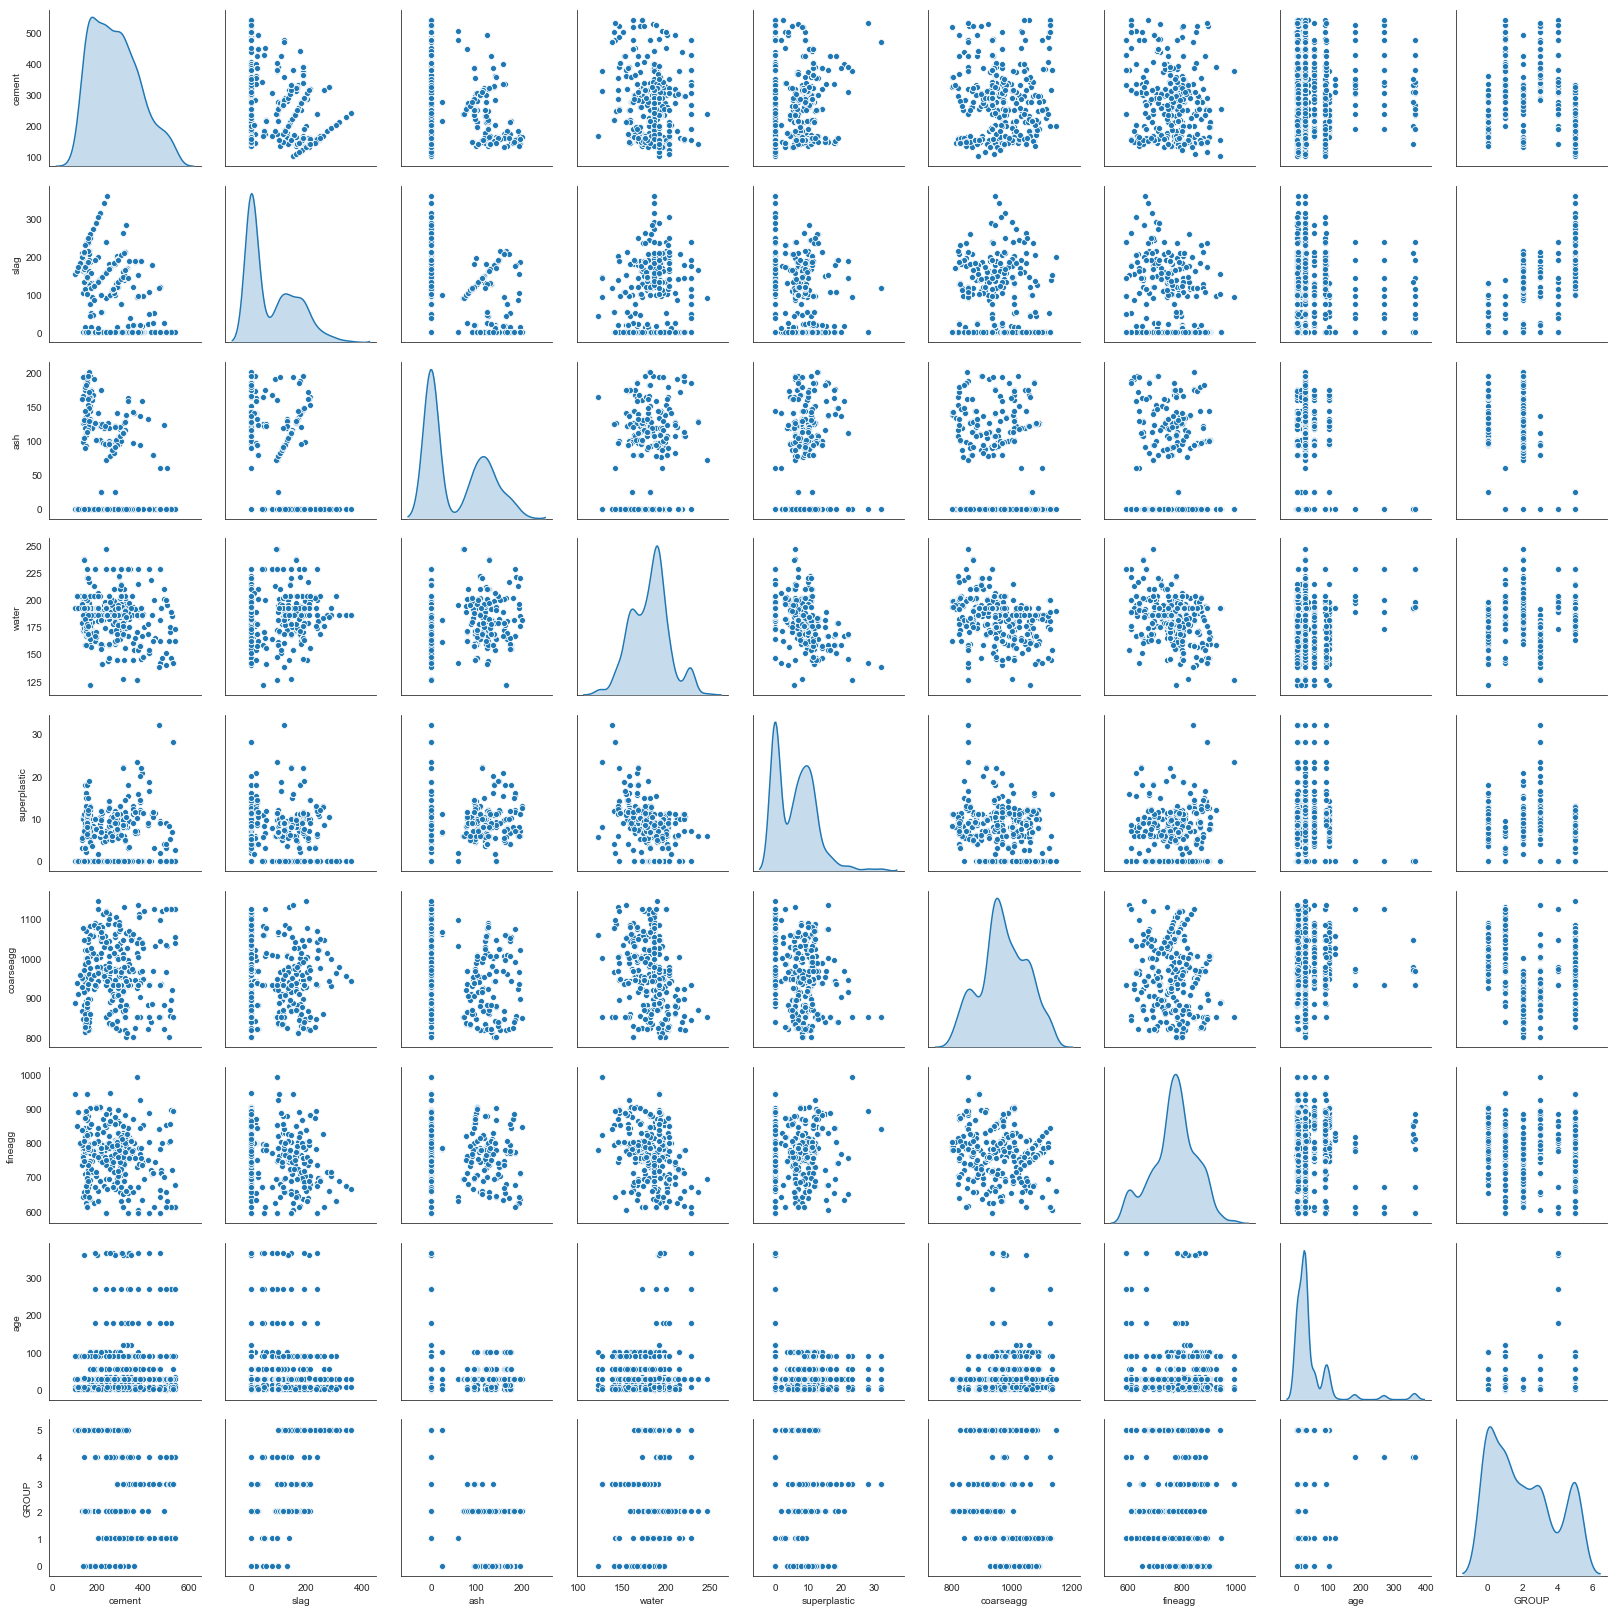

In [66]:
sns.pairplot(ZXFinal,diag_kind='kde')

In [67]:
ZXFinal.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,GROUP
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.078380,-0.004398
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.033240,0.728795
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.141819,-0.585358
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.272919,0.279400
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.172966,-0.145311
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.007472,-0.302926
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.170441,-0.218031
age,0.078380,-0.033240,-0.141819,0.272919,-0.172966,-0.007472,-0.170441,1.000000,0.167493
GROUP,-0.004398,0.728795,-0.585358,0.279400,-0.145311,-0.302926,-0.218031,0.167493,1.000000


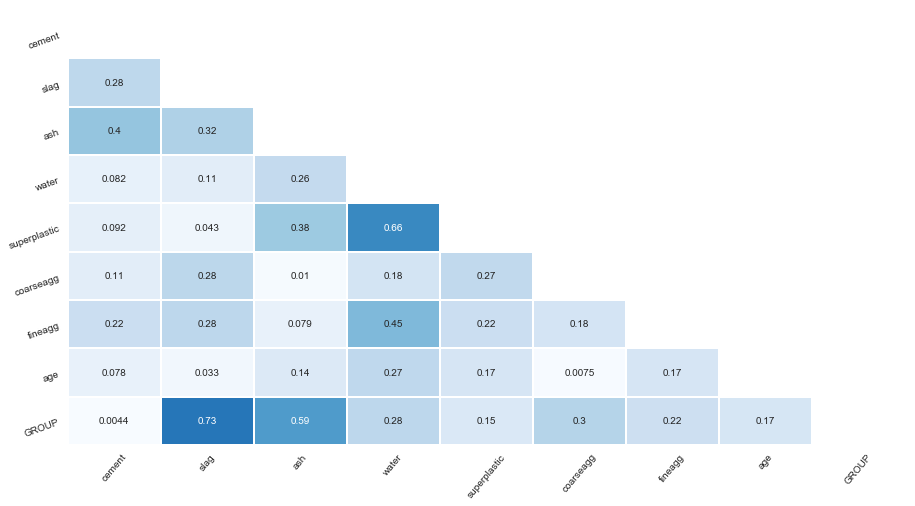

In [68]:
corr = abs(ZXFinal.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [69]:
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### None of the features are highly inter correlated or correlated with the target variable STRENGTH

### Correlation matrix didnt tell much :-() 

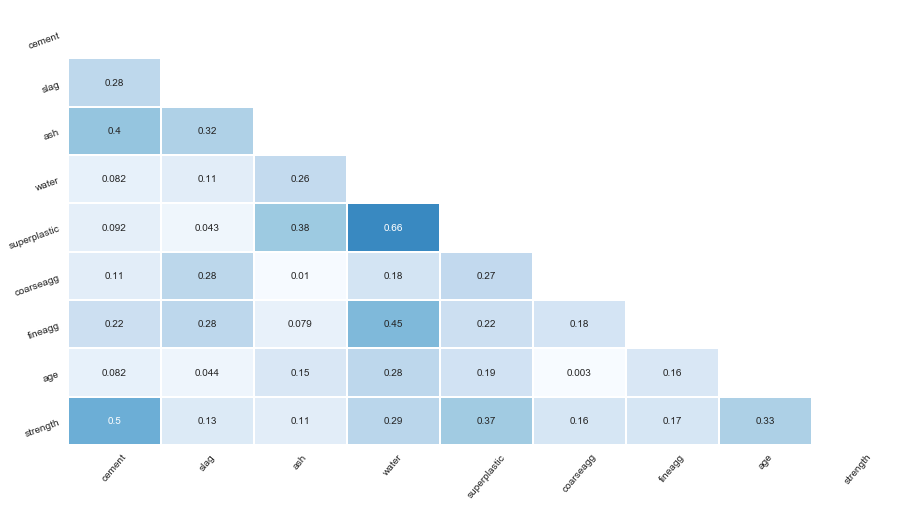

In [70]:
#Using Pearson Correlation
corr = abs(concrete.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

In [71]:
#Correlation >0.5 
cor_target = abs(corr["strength"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

strength    1.0
Name: strength, dtype: float64

In [72]:
X = concrete.drop('strength', axis=1)
y = concrete[['strength']]

ZX= X.apply(zscore)
Zy= y.apply(zscore)

#X.loc[:,:] = ZX 
#y.loc[:,:] = Zy

X_train, X_test, y_train, y_test = train_test_split(ZX, Zy,
                                                    random_state = my_random_state, test_size=0.3 )


print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(721, 8) (309, 8)
(721, 1) (309, 1)


In [73]:
print(X_train.columns)
print(X_test.columns)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape,y_train.columns)
print(y_test.shape,y_test.columns)
print(X.shape)
print(y.shape,y.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')
(721, 8)
(309, 8)
(721, 1) Index(['strength'], dtype='object')
(309, 1) Index(['strength'], dtype='object')
(1030, 8)
(1030, 1) Index(['strength'], dtype='object')


## Lets move on algorithinms !!!!

### Linear Regression : Cement > Slag > Age > Ash are most imp features identified

[[ 0.75588891  0.56838767  0.31846645 -0.1504677   0.13999017  0.11643353
   0.11995121  0.47302438]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
LINEAR REGRESSION
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The coefficient for cement is 0.7558889142530828
The coefficient for slag is 0.568387669234012
The coefficient for ash is 0.31846645020258896
The coefficient for water is -0.15046770130786058
The coefficient for superplastic is 0.13999016819808538
The coefficient for coarseagg is 0.11643352777288338
The coefficient for fineagg is 0.11995121433661399
The coefficient for age is 0.47302438450674494

The intercept for our model is 0.013475440721864443


LINEAR REGRESSION (Train Score): 0.6473674260578932
LINEAR REGRESSION (Test Score): 0.5211833673904238
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Text(0.5, 1.0, 'Feature importance using LinearRegression Model')

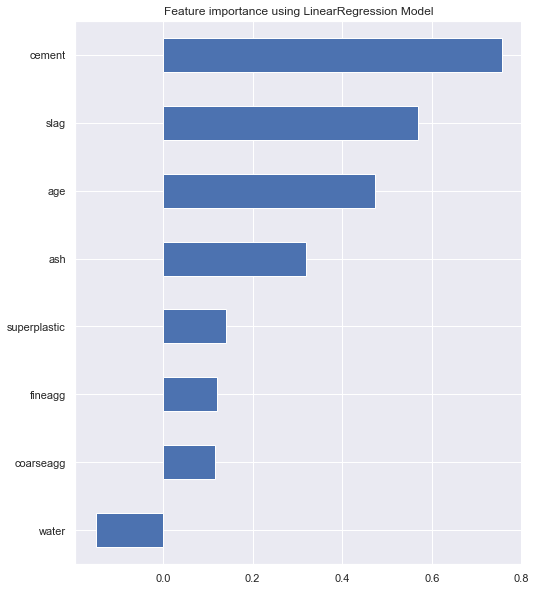

In [120]:
logRegA = LinearRegression()
logRegA.fit(X_train,y_train)
y_test1A_predict = logRegA.predict(X_test)
print(logRegA.coef_)
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("LINEAR REGRESSION")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, logRegA.coef_[0][idx]))

interceptA = logRegA.intercept_[0]
print('')
print("The intercept for our model is {}".format(interceptA))
print('')
print('')
print('LINEAR REGRESSION (Train Score):',logRegA.score(X_train, y_train))
print('LINEAR REGRESSION (Test Score):',logRegA.score(X_test, y_test))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

lG1=logRegA.score(X_train, y_train)
lG2=logRegA.score(X_test, y_test)
LigReg=[[lG1,lG2]]
LinReg_Model = pd.DataFrame(LigReg,columns= ['Train','Test'],index=['LinearRegression'])

linTmp=[logRegA.coef_[0][0],logRegA.coef_[0][1],logRegA.coef_[0][2],logRegA.coef_[0][3],logRegA.coef_[0][4],
        logRegA.coef_[0][5],logRegA.coef_[0][6],logRegA.coef_[0][7]]

LinCoef = pd.Series(linTmp, index = X.columns)
lin_coef = LinCoef.sort_values()

feaImp1=pd.DataFrame(lin_coef,columns=['LinearRegression'])
feaValImp1=[feaImp1.iloc[0,0],feaImp1.iloc[1,0],feaImp1.iloc[2,0],feaImp1.iloc[3,0],feaImp1.iloc[4,0],feaImp1.iloc[5,0],
           feaImp1.iloc[6,0],feaImp1.iloc[7,0]]

plt.rcParams['figure.figsize'] = (8.0, 10.0)
lin_coef.plot(kind = "barh")
plt.title("Feature importance using LinearRegression Model")


### ### RIDGE : Cement > Slag > Age > Ash are most imp features identified. Water has adverse relationship.

Ridge model coefficients : [[ 0.75129826  0.563876    0.31442479 -0.15347969  0.14006095  0.11332612
   0.1158857   0.47255232]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
 RIDGE 
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
The coefficient for cement is 0.7512982584015244
The coefficient for slag is 0.5638760004404507
The coefficient for ash is 0.31442478710298144
The coefficient for water is -0.15347969312524806
The coefficient for superplastic is 0.14006095144743877
The coefficient for coarseagg is 0.11332612080204815
The coefficient for fineagg is 0.11588570499574126
The coefficient for age is 0.4725523237550315

The intercept for our model is 0.013500384366486602


RIDGE (Train Score) : 0.6473642335136961
RIDGE (Test Score) : 0.5212839292366851
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


Text(0.5, 1.0, 'Feature importance using RIDGE Model')

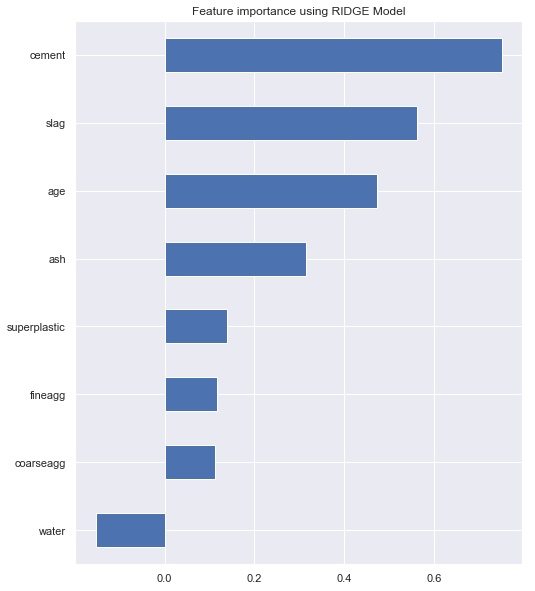

In [123]:
## RIDGE
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model coefficients :", (ridge.coef_))

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print(" RIDGE ")
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
for idx, col_name in enumerate(X.columns):
    print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

interceptA = ridge.intercept_[0]
print('')
print("The intercept for our model is {}".format(interceptA))
print('')
print('')
print('RIDGE (Train Score) :',ridge.score(X_train, y_train))
print('RIDGE (Test Score) :',ridge.score(X_test, y_test))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

rG1=ridge.score(X_train, y_train)
rG2=ridge.score(X_test, y_test)
RidReg=[[rG1,rG2]]
Ridge_Model = pd.DataFrame(RidReg,columns= ['Train','Test'],index=['RIDGE'])

tst=[ridge.coef_[0][0],ridge.coef_[0][1],ridge.coef_[0][2],ridge.coef_[0][3],ridge.coef_[0][4],ridge.coef_[0][5],
     ridge.coef_[0][6],ridge.coef_[0][7]]

#ridCoef = pd.Series(ridge.coef_, index = X.columns)
ridCoef = pd.Series(tst, index = X.columns)
rid_coef = ridCoef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
rid_coef.plot(kind = "barh")

feaImp2=pd.DataFrame(lin_coef,columns=['Ridge'])
feaValImp2=[feaImp2.iloc[0,0],feaImp2.iloc[1,0],feaImp2.iloc[2,0],feaImp2.iloc[3,0],feaImp2.iloc[4,0],feaImp2.iloc[5,0],
           feaImp2.iloc[6,0],feaImp2.iloc[7,0]]

plt.title("Feature importance using RIDGE Model")


### ### LASSO : Cement > Age > Superplastic > Slag are most imp features identified. Has also made coefficients of Fineagg, Coarseagg & Ash ZERO 

LASSO model: [ 0.40638672  0.1894016   0.         -0.10033765  0.21004837 -0.
 -0.          0.30214112]

The intercept for our model is 0.01229030176551873


LASSO (Train Score) : 0.5690025471824285
LASSO (Test Score) : 0.4614581247600969
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


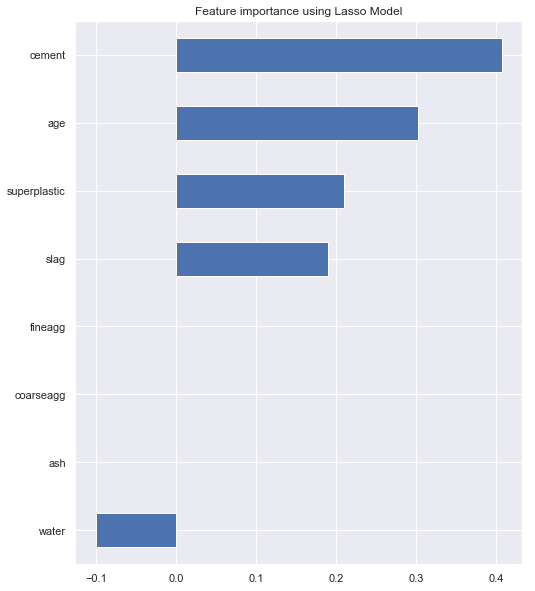

In [124]:
## LASSO
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("LASSO model:", (lasso.coef_))

interceptA = lasso.intercept_[0]
print('')
print("The intercept for our model is {}".format(interceptA))
print('')
print('')
print('LASSO (Train Score) :',lasso.score(X_train, y_train))
print('LASSO (Test Score) :',lasso.score(X_test, y_test))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

lG1=lasso.score(X_train, y_train)
lG2=lasso.score(X_test, y_test)
lassReg=[[lG1,lG2]]
Lasso_Model = pd.DataFrame(lassReg,columns= ['Train','Test'],index=['LASSO'])


coef = pd.Series(lasso.coef_, index = X.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

feaImp3=pd.DataFrame(imp_coef,columns=['Lasso'])
feaValImp3=[feaImp3.iloc[0,0],feaImp3.iloc[1,0],feaImp3.iloc[2,0],feaImp3.iloc[3,0],feaImp3.iloc[4,0],feaImp3.iloc[5,0],
           feaImp3.iloc[6,0],feaImp3.iloc[7,0]]


In [131]:
LinReg_Model

,Train,Test
LinearRegression,0.647367,0.521183


In [156]:
def plotImpFeatures():
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    ax[0].plot(feaImp1.index.values,feaImp1['LinearRegression'],feaValImp1,'bo')
    ax[0].set_xlabel('Linear Regression')
    ax[0].set_ylabel('Feature Imp')
    ax[0].legend()
    ax[1].plot(feaImp2.index.values,feaImp2['Ridge'],feaValImp2,'bo')
    ax[1].set_xlabel('RIDGE')
    ax[1].set_ylabel('Feature Imp')
    ax[1].legend()
    ax[2].plot(feaImp3.index.values,feaImp3['Lasso'],feaValImp3,'bo')
    ax[2].set_xlabel('LASSO')
    ax[2].set_ylabel('Feature Imp')
    ax[2].legend()
    return 1


def plotModels():
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    ax[0].plot(LinReg_Model.index.values,LinReg_Model['Train'],LigReg,'bo')
    ax[0].set_ylabel('Model Accuracy')
    ax[1].plot(Ridge_Model.index.values,Ridge_Model['Train'],RidReg,'bo')
    ax[2].plot(Lasso_Model.index.values,Lasso_Model['Train'],lassReg,'bo')


## LassoCV has Superplastic as top feature

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best alpha using built-in LassoCV: 0.868299
Best score using built-in LassoCV: 0.615354
Lasso picked 8 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

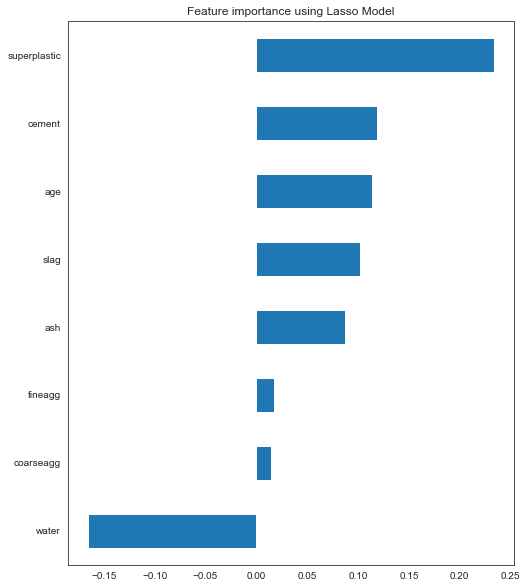

In [78]:

reg = LassoCV(cv=10)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

## Polynomial Features are created with PolynomialFeatures = 2,3,4,5,6 tested across LinearRegression(), Lasso & Rigde 

In [79]:
resArr = pd.DataFrame(columns=['Poly','Tr-LinReg','Ts-LinReg','Tr-Lasso','Ts-Lasso','Tr-Ridge','Ts-Ridge'],
                      index=[0,1,2,3,4])
k=0
for i in np.arange(2,7):
    row = [1,1,1,1] 
    poly = PolynomialFeatures(degree = i) #, interaction_only=True)
    print(poly)
    X_poly = poly.fit_transform(ZX)
    print(X_poly.shape)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, Zy, test_size=0.30, random_state=1)
    logRegi = LinearRegression()
    logRegi.fit(X_train,y_train)
    y_train1i_predict = logRegi.predict(X_train)
    y_test1i_predict = logRegi.predict(X_test)
    #print(logRegi.coef_)
    intercepti = logRegi.intercept_[0]
    ##Ridge
    ridgei = Ridge(alpha=.3)
    ridgei.fit(X_train,y_train)
    #print ("Ridge model coefficients :", (ridge.coef_))
    interceptAi = ridgei.intercept_[0]
    lassoi = Lasso(alpha=0.1)
    lassoi.fit(X_train,y_train)
    interceptBi = lassoi.intercept_[0]
    
    #print("ks is ",k)
    resArr.iloc[k]["Poly"]=i
    resArr.iloc[k]["Tr-LinReg"]=logRegi.score(X_train, y_train)
    resArr.iloc[k]["Ts-LinReg"]=logRegi.score(X_test, y_test)

    resArr.iloc[k]["Tr-Lasso"]=ridgei.score(X_train, y_train)
    resArr.iloc[k]["Ts-Lasso"]=ridgei.score(X_test, y_test)

    resArr.iloc[k]["Tr-Ridge"]=lassoi.score(X_train, y_train)
    resArr.iloc[k]["Ts-Ridge"]=lassoi.score(X_test, y_test)
    
    
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")    
    print('(POLYNOMIAL=',i,') LINEAR REGRESSION (Train Score):',logRegi.score(X_train, y_train))
    print('(POLYNOMIAL=',i,') LINEAR REGRESSION (Test Score):',logRegi.score(X_test, y_test))
    print('(POLYNOMIAL=',i,') LINEAR REGRESSION Intercept {}'.format(interceptAi))  
    print("==================================================================================")    
    print('(POLYNOMIAL=',i,') RIDGE (Train Score):',ridgei.score(X_train, y_train))
    print('(POLYNOMIAL=',i,') RIDGE (Test Score):',ridgei.score(X_test, y_test))
    print('(POLYNOMIAL=',i,') RIDGE Intercept {}'.format(interceptAi))
    print("==================================================================================")    
    print('(POLYNOMIAL=',i,') LASSO (Train Score):',lassoi.score(X_train, y_train))
    print('(POLYNOMIAL=',i,') LASSO (Test Score):',lassoi.score(X_test, y_test))
    print('(POLYNOMIAL=',i,') LASSO Intercept {}'.format(interceptBi))  
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print('')
    print('')
    k=k+1

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)
(1030, 45)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(POLYNOMIAL= 2 ) LINEAR REGRESSION (Train Score): 0.8128160328713393
(POLYNOMIAL= 2 ) LINEAR REGRESSION (Test Score): 0.7902302312157525
(POLYNOMIAL= 2 ) LINEAR REGRESSION Intercept 0.44435338212720915
(POLYNOMIAL= 2 ) RIDGE (Train Score): 0.8126814670080893
(POLYNOMIAL= 2 ) RIDGE (Test Score): 0.7892711514867892
(POLYNOMIAL= 2 ) RIDGE Intercept 0.44435338212720915
(POLYNOMIAL= 2 ) LASSO (Train Score): 0.6179834212015229
(POLYNOMIAL= 2 ) LASSO (Test Score): 0.6054284508525218
(POLYNOMIAL= 2 ) LASSO Intercept 0.10404417655057135
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)
(1030, 165)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(POLYNOMIAL= 3 ) LINEAR REGRESSION (Train Score)

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(POLYNOMIAL= 5 ) LINEAR REGRESSION (Train Score): 0.9923035871009628
(POLYNOMIAL= 5 ) LINEAR REGRESSION (Test Score): -7237.142448611847
(POLYNOMIAL= 5 ) LINEAR REGRESSION Intercept 0.32738707657850524
(POLYNOMIAL= 5 ) RIDGE (Train Score): 0.9850079799571942
(POLYNOMIAL= 5 ) RIDGE (Test Score): -1.8027542363661742
(POLYNOMIAL= 5 ) RIDGE Intercept 0.32738707657850524
(POLYNOMIAL= 5 ) LASSO (Train Score): 0.6373670393768429
(POLYNOMIAL= 5 ) LASSO (Test Score): 0.5638223563226208
(POLYNOMIAL= 5 ) LASSO Intercept 0.0004964658997713527
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


PolynomialFeatures(degree=6, include_bias=True, interaction_only=False)
(1030, 3003)


C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(POLYNOMIAL= 6 ) LINEAR REGRESSION (Train Score): 0.9948592423407845
(POLYNOMIAL= 6 ) LINEAR REGRESSION (Test Score): -2040566470.480817
(POLYNOMIAL= 6 ) LINEAR REGRESSION Intercept 0.3004918016520311
(POLYNOMIAL= 6 ) RIDGE (Train Score): 0.9889948283646129
(POLYNOMIAL= 6 ) RIDGE (Test Score): -7.333828478336489
(POLYNOMIAL= 6 ) RIDGE Intercept 0.3004918016520311
(POLYNOMIAL= 6 ) LASSO (Train Score): 0.6589292907417569
(POLYNOMIAL= 6 ) LASSO (Test Score): 0.6084201359800396
(POLYNOMIAL= 6 ) LASSO Intercept -0.025840638700309133
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++




In [80]:
resArr

,Poly,Tr-LinReg,Ts-LinReg,Tr-Lasso,Ts-Lasso,Tr-Ridge,Ts-Ridge
0,2,0.812816,0.79023,0.812681,0.789271,0.617983,0.605428
1,3,0.93115,0.869821,0.928418,0.876748,0.612225,0.57283
2,4,0.983492,-6787.35,0.974674,-0.00424408,0.64309,0.603186
3,5,0.992304,-7237.14,0.985008,-1.80275,0.637367,0.563822
4,6,0.994859,-2.04057e+09,0.988995,-7.33383,0.658929,0.60842


In [152]:
## Linear Regression (Train & test results)
def plotAccModels():
    lgTr0=resArr.iloc[0]["Tr-LinReg"]
    lgTr1=resArr.iloc[1]["Tr-LinReg"]
    lgTr2=resArr.iloc[2]["Tr-LinReg"]
    lgTr3=resArr.iloc[3]["Tr-LinReg"]
    lgTr4=resArr.iloc[4]["Tr-LinReg"]

    lgTs0=resArr.iloc[0]["Ts-LinReg"]
    lgTs1=resArr.iloc[1]["Ts-LinReg"]
    lgTs2=resArr.iloc[2]["Ts-LinReg"]
    lgTs3=resArr.iloc[3]["Ts-LinReg"]
    lgTs4=resArr.iloc[4]["Ts-LinReg"]

    resVal1=[lgTr0,lgTr1,lgTr2,lgTr3,lgTr4]
    resVal2=[lgTs0,lgTs1,lgTs2,lgTs3,lgTs4]


    Compare1_Models = pd.DataFrame(resVal1, columns= ['Train - Linear Regression'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])

    Compare2_Models = pd.DataFrame(resVal2, columns= ['Test - Linear Regression'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])

## Lasso (Train & test results)
    lassTr0=resArr.iloc[0]["Tr-Lasso"]
    lassTr1=resArr.iloc[1]["Tr-Lasso"]
    lassTr2=resArr.iloc[2]["Tr-Lasso"]
    lassTr3=resArr.iloc[3]["Tr-Lasso"]
    lassTr4=resArr.iloc[4]["Tr-Lasso"]

    lassTs0=resArr.iloc[0]["Ts-Lasso"]
    lassTs1=resArr.iloc[1]["Ts-Lasso"]
    lassTs2=resArr.iloc[2]["Ts-Lasso"]
    lassTs3=resArr.iloc[3]["Ts-Lasso"]
    lassTs4=resArr.iloc[4]["Ts-Lasso"]

    lassVal1=[lassTr0,lassTr1,lassTr2,lassTr3,lassTr4]
    lassVal2=[lassTs0,lassTs1,lassTs2,lassTs3,lassTs4]

    Compare3_Models = pd.DataFrame(lassVal1, columns= ['Train - LASSO'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])

    Compare4_Models = pd.DataFrame(lassVal2, columns= ['Test - LASSO'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])

## RIDGE (Train & test results)
    rdgTr0=resArr.iloc[0]["Tr-Ridge"]
    rdgTr1=resArr.iloc[1]["Tr-Ridge"]
    rdgTr2=resArr.iloc[2]["Tr-Ridge"]
    rdgTr3=resArr.iloc[3]["Tr-Ridge"]
    rdgTr4=resArr.iloc[4]["Tr-Ridge"]

    rdgTs0=resArr.iloc[0]["Ts-Ridge"]
    rdgTs1=resArr.iloc[1]["Ts-Ridge"]
    rdgTs2=resArr.iloc[2]["Ts-Ridge"]
    rdgTs3=resArr.iloc[3]["Ts-Ridge"]
    rdgTs4=resArr.iloc[4]["Ts-Ridge"]

    rdgVal1=[rdgTr0,rdgTr1,rdgTr2,rdgTr3,rdgTr4]
    rdgVal2=[rdgTs0,rdgTs1,rdgTs2,rdgTs3,lassTs4]

    Compare5_Models = pd.DataFrame(rdgVal1, columns= ['Train - RIDGE'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])

    Compare6_Models = pd.DataFrame(rdgVal2, columns= ['Test - RIDGE'], 
                                  index=['Poly=2','Poly=3','Poly=4','Poly=5','Poly=6'])
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    ax[0].plot(Compare1_Models.index.values, Compare1_Models['Train - Linear Regression'],resVal1,'bo')
    ax[0].plot(Compare2_Models.index.values, Compare2_Models['Test - Linear Regression'],resVal2,'^')
    ax[0].set_xlabel('Linear Regression')
    ax[0].set_ylabel('Accuracy %')
    ax[0].legend()
    ax[1].plot(Compare3_Models.index.values, Compare3_Models['Train - LASSO'],lassVal1,'bo')
    ax[1].plot(Compare4_Models.index.values, Compare4_Models['Test - LASSO'],lassVal2,'^')
    ax[1].set_xlabel('LASSO ')
    ax[1].set_ylabel('Accuracy %')
    ax[1].legend()
    ax[2].plot(Compare5_Models.index.values, Compare5_Models['Train - RIDGE'],rdgVal1,'bo')
    ax[2].plot(Compare6_Models.index.values, Compare6_Models['Test - RIDGE'],rdgVal2,'^')
    ax[2].set_xlabel('RIDGE ')
    ax[2].set_ylabel('Accuracy %')
    ax[2].legend()
    return 2;


In [82]:
resArr

,Poly,Tr-LinReg,Ts-LinReg,Tr-Lasso,Ts-Lasso,Tr-Ridge,Ts-Ridge
0,2,0.812816,0.79023,0.812681,0.789271,0.617983,0.605428
1,3,0.93115,0.869821,0.928418,0.876748,0.612225,0.57283
2,4,0.983492,-6787.35,0.974674,-0.00424408,0.64309,0.603186
3,5,0.992304,-7237.14,0.985008,-1.80275,0.637367,0.563822
4,6,0.994859,-2.04057e+09,0.988995,-7.33383,0.658929,0.60842


### Beyond PolynomialFeatures(degree >2) the model does not perform well on Test set. From this it is clear that the model is non linear. Thus we proceed to other non-linear models.

# 1st Method
### Decision Tree regressor algorithim using Randomized search function to calculate model accuracy accross various factors 

In [83]:
X = concrete.drop('strength', axis=1)
y = concrete[['strength']]

ZX= X.apply(zscore)
Zy= y.apply(zscore)

X_train, X_test, y_train, y_test = train_test_split(ZX, Zy,random_state = my_random_state, test_size=0.3 )

In [84]:
## DECISION TREE regressor

now = datetime.now()
dt1_string = now.strftime("%d/%m/%Y %H:%M:%S")
finDTrLis=[]
finDTsLis=[]
for i in np.arange(1,6):
    now = datetime.now()
    loopDT1 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Starts @ ",loopDT1)
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    dt1=DecisionTreeRegressor()
    param_dist = {'criterion' : ['mse','mae'],
                  'min_samples_split': sp_randint(3,15,2),
                  'max_depth':sp_randint(20,50)
                 }
    randomCV = RandomizedSearchCV(dt1, param_distributions=param_dist, n_iter=20,cv=10) #default cv = 3
    randomCV.fit(X, y)
    listRandom=randomCV.best_params_
    print(randomCV.best_params_)
    dt1=DecisionTreeRegressor(criterion=listRandom['criterion'],
                        max_depth=listRandom['max_depth'],
                         min_samples_split=listRandom['min_samples_split'])

    dt1.fit(X_train,y_train.values.ravel())
    print (pd.DataFrame(dt1.feature_importances_, columns = ["Imp"], index = X_train.columns))
    y_pred_dttr=dt1.predict(X_train)
    y_pred_dtte=dt1.predict(X_test)
    dtTr=r2_score(y_train.values.ravel(),y_pred_dttr)
    dtTs=r2_score(y_test.values.ravel(),y_pred_dtte)

    finDTsLis.append(dtTs)
    finDTrLis.append(dtTr)
    print(" ")
    print("(RandomSearch) Best Parms : ",randomCV.best_params_ )
    print('(RandomSearch) DecisionTreeRegressor Train accuracy score: ',dtTr)
    print('(RandomSearch) DecisionTreeRegressor Test accuracy score: ',dtTs)
    now = datetime.now()
    loopDT2 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Ends@ ",loopDT2)
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    time.sleep(20) 

now = datetime.now()
dt_string2 = now.strftime("%d/%m/%Y %H:%M:%S")
print(" ")
print("Total execution time: ", dt1_string," : ",dt_string2)
print(" ")

Compare1A_Models = pd.DataFrame(finDTrLis, columns= ['TrainAccuracy'], 
                                  index=[1,2,3,4,5])
Compare1B_Models = pd.DataFrame(finDTsLis, columns= ['TestAccuracy'], 
                                  index=[1,2,3,4,5])


feaImp4=pd.DataFrame(dt1.feature_importances_,columns=['DTR'],index=['cement','slag','ash','water','superplastic',
                                                                     'coarseagg','fineagg','age'])
feaValImp4=[feaImp4.iloc[0,0],feaImp4.iloc[1,0],feaImp4.iloc[2,0],feaImp4.iloc[3,0],feaImp4.iloc[4,0],feaImp4.iloc[5,0],
           feaImp4.iloc[6,0],feaImp4.iloc[7,0]]

accHist=pd.Series(finDTsLis,index=[1,2,3,4,5])
accHistSort=accHist.sort_values()


def plotDTR():
    fig, ax = plt.subplots(1,3, figsize = (20,5))
    ax[0].plot(Compare1A_Models.index.values, Compare1A_Models['TrainAccuracy'])
    ax[0].plot(Compare1B_Models.index.values, Compare1B_Models['TestAccuracy'])
    ax[0].set_xlabel(' DecisionTreeRegressor ')
    ax[0].set_ylabel('Accuracy %')
    ax[0].legend()
    ax[1].plot(feaImp4.index.values,feaImp4['DTR'],feaValImp4,'bo')
    ax[1].set_xlabel('DecisionTreeRegressor')
    ax[1].set_ylabel('Feature Imp')
    ax[1].legend()
    ax[2].hist(accHistSort)
    plt.show()
    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(finDTsLis, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(finDTsLis, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
    sns.set(style="darkgrid", color_codes=True)  
    with sns.axes_style("white"):
        sns.jointplot(x=y_test.values.ravel(), y=y_pred_dtte, stat_func=pearsonr,kind="reg", color="k");    
    
    return 2;

++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Starts @  25/01/2020 17:05:36
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 42, 'min_samples_split': 7}
                   Imp
cement        0.309526
slag          0.068901
ash           0.010195
water         0.091276
superplastic  0.106370
coarseagg     0.025888
fineagg       0.075673
age           0.312171
 
(RandomSearch) Best Parms :  {'criterion': 'mse', 'max_depth': 42, 'min_samples_split': 7}
(RandomSearch) DecisionTreeRegressor Train accuracy score:  0.9750651970560682
(RandomSearch) DecisionTreeRegressor Test accuracy score:  0.7559717969827011
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Ends@  25/01/2020 17:05:47
+++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  2  Starts @  25/01/2020 17:06:07
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 39, 'min_samples_split

## 2nd Method

### AdaBoost algorithim using Randomized search function to calculate model accuracy accross various factors 

In [85]:
## Adaboost
now = datetime.now()
dt1_string = now.strftime("%d/%m/%Y %H:%M:%S")
finATrLis=[]
finATsLis=[]

for i in np.arange(1,6):
    now = datetime.now()
    loopDT1 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Starts @ ",loopDT1)
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    model = AdaBoostRegressor()
    param_dist ={'n_estimators':sp_randint(100,500)}
    randomCV = RandomizedSearchCV(model, param_distributions=param_dist,cv=10) 
    randomCV.fit(X, y.values.ravel())
    listRandom=randomCV.best_params_
    print(randomCV.best_params_)
    rfr=AdaBoostRegressor(n_estimators=listRandom['n_estimators'])

    print(rfr)
    rfr.fit(X_train,y_train.values.ravel())
#    rfr.score(X_train,y_train.values.ravel())
    y_pred_rfrtr=rfr.predict(X_train)
    y_pred_rfrte=rfr.predict(X_test)

    adaTr=r2_score(y_train.values.ravel(),y_pred_rfrtr)
    adaTs=r2_score(y_test.values.ravel(),y_pred_rfrte)

    finATsLis.append(adaTs)
    finATrLis.append(adaTr)
    print(" ")
    print("(RandomSearch) Best Parms : ",randomCV.best_params_ )
    print('(RandomSearch) AdaBoostRegressor Train accuracy score: ',adaTr)
    print('(RandomSearch) AdaBoostRegressor Test accuracy score: ',adaTs)
    now = datetime.now()
    loopDT2 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Ends@ ",loopDT2)
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    time.sleep(20) 
now = datetime.now()
dt_string2 = now.strftime("%d/%m/%Y %H:%M:%S")
print(" ")
print("Total execution time: ", dt1_string," : ",dt_string2)
print(" ")

Compare2A_Models = pd.DataFrame(finATrLis, columns= ['TrainAccuracy'], 
                                  index=[1,2,3,4,5])
Compare2B_Models = pd.DataFrame(finATsLis, columns= ['TestAccuracy'], 
                                  index=[1,2,3,4,5])

addRHist=pd.Series(finATsLis,index=[1,2,3,4,5])
addRHistSort=addRHist.sort_values()

def plotAdaBst():
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax[0].plot(Compare2A_Models.index.values, Compare2A_Models['TrainAccuracy'])
    ax[0].plot(Compare2B_Models.index.values, Compare2B_Models['TestAccuracy'])
    ax[0].set_xlabel(' Iteration ')
    ax[0].set_ylabel('Accuracy %')
    ax[0].set_title('AdaBoostRegressor')
    ax[0].legend()
    ax[1].hist(addRHistSort)
    plt.show()
    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(finATsLis, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(finATsLis, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
   
    
    

++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Starts @  25/01/2020 17:08:05
++++++++++++++++++++++++++++++++++++++++++++++++
{'n_estimators': 163}
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=163, random_state=None)
 
(RandomSearch) Best Parms :  {'n_estimators': 163}
(RandomSearch) AdaBoostRegressor Train accuracy score:  0.8286765270615017
(RandomSearch) AdaBoostRegressor Test accuracy score:  0.7731155876810727
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Ends@  25/01/2020 17:09:38
+++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  2  Starts @  25/01/2020 17:09:38
++++++++++++++++++++++++++++++++++++++++++++++++
{'n_estimators': 116}
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=116, random_state=None)
 
(RandomSearch) Best Parms :  {'n_estimators': 116}
(RandomSearch) AdaBoostRegressor Train

# 3rd method
#### RandomForest algorithim to calucalte model accuracy using Randomized search function 

In [158]:
## Random forest
now = datetime.now()
dt1_string = now.strftime("%d/%m/%Y %H:%M:%S")
finRTrLis=[]
finRTsLis=[]

for i in np.arange(1,6):
    now = datetime.now()
    loopDT1 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Starts @ ",loopDT1)
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    rfr=RandomForestRegressor(n_estimators=150)
    param_dist = {'criterion' : ['mse','mae'],
                  'max_leaf_nodes': sp_randint(20,250),
                  'max_depth':sp_randint(17,120),
                  'min_samples_split': sp_randint(40,100),
                  'max_features':sp_randint(2,8)}
    randomCV = RandomizedSearchCV(rfr, param_distributions=param_dist,cv=10) #default cv = 3
    randomCV.fit(X, y.values.ravel())
    listRandom=randomCV.best_params_
    print(randomCV.best_params_)
    rfr=RandomForestRegressor(criterion=listRandom['criterion'],
                              max_depth=listRandom['max_depth'],
                              max_features=listRandom['max_features'],
                              max_leaf_nodes=listRandom['max_leaf_nodes'],
                              min_samples_split=listRandom['min_samples_split'])

    print(rfr)
    rfr.fit(X_train,y_train.values.ravel())
    #rfr.score(X_train,y_train.values.ravel())
    y_pred_rfrtr=rfr.predict(X_train)
    y_pred_rfrte=rfr.predict(X_test)
    forTr=r2_score(y_train.values.ravel(),y_pred_rfrtr)
    forTs=r2_score(y_test.values.ravel(),y_pred_rfrte)

    finRTsLis.append(forTs)
    finRTrLis.append(forTr)
    print(" ")
    print("(RandomSearch) Best Parms : ",randomCV.best_params_ )
    print('(RandomSearch) RandomForestRegressor Train accuracy score: ',forTr)
    print('(RandomSearch) RandomForestRegressor Test accuracy score: ',forTs)
    now = datetime.now()
    loopDT2 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Ends@ ",loopDT2)
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    time.sleep(20) 
now = datetime.now()
dt_string2 = now.strftime("%d/%m/%Y %H:%M:%S")
print(" ")
print("Total execution time: ", dt1_string," : ",dt_string2)
print(" ")

Compare3A_Models = pd.DataFrame(finRTrLis, columns= ['TrainAccuracy'], 
                                  index=[1,2,3,4,5])
Compare3B_Models = pd.DataFrame(finRTsLis, columns= ['TestAccuracy'], 
                                  index=[1,2,3,4,5])
ranHist=pd.Series(finRTsLis,index=[1,2,3,4,5])
ranHistSort=ranHist.sort_values()

def plotRanFor():
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    ax[0].plot(Compare3A_Models.index.values, Compare3A_Models['TrainAccuracy'])
    ax[0].plot(Compare3B_Models.index.values, Compare3B_Models['TestAccuracy'])
    ax[0].set_xlabel(' RandomForestRegressor ')
    ax[0].set_ylabel('Accuracy %')
    ax[0].legend()
    ax[1].hist(ranHistSort)
    plt.show()
    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(finRTsLis, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(finRTsLis, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))


++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Starts @  25/01/2020 20:00:56
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 52, 'max_features': 6, 'max_leaf_nodes': 178, 'min_samples_split': 53}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=52,
           max_features=6, max_leaf_nodes=178, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=53, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
 
(RandomSearch) Best Parms :  {'criterion': 'mse', 'max_depth': 52, 'max_features': 6, 'max_leaf_nodes': 178, 'min_samples_split': 53}
(RandomSearch) RandomForestRegressor Train accuracy score:  0.8330959623260727
(RandomSearch) RandomForestRegressor Test accuracy score:  0.7803018635918662
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Ends@  25/01

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  2  Starts @  25/01/2020 20:02:31
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mae', 'max_depth': 55, 'max_features': 4, 'max_leaf_nodes': 174, 'min_samples_split': 40}
RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=55,
           max_features=4, max_leaf_nodes=174, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
 
(RandomSearch) Best Parms :  {'criterion': 'mae', 'max_depth': 55, 'max_features': 4, 'max_leaf_nodes': 174, 'min_samples_split': 40}
(RandomSearch) RandomForestRegressor Train accuracy score:  0.8508904160872173
(RandomSearch) RandomForestRegressor Test accuracy score:  0.8009530963638474
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  2  Ends@  25/01

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  3  Starts @  25/01/2020 20:04:06
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 107, 'max_features': 5, 'max_leaf_nodes': 240, 'min_samples_split': 40}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=107,
           max_features=5, max_leaf_nodes=240, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
 
(RandomSearch) Best Parms :  {'criterion': 'mse', 'max_depth': 107, 'max_features': 5, 'max_leaf_nodes': 240, 'min_samples_split': 40}
(RandomSearch) RandomForestRegressor Train accuracy score:  0.8549961004031872
(RandomSearch) RandomForestRegressor Test accuracy score:  0.7890330574539378
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  3  Ends@  25

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  4  Starts @  25/01/2020 20:06:36
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 65, 'max_features': 3, 'max_leaf_nodes': 61, 'min_samples_split': 49}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=65,
           max_features=3, max_leaf_nodes=61, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=49, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
 
(RandomSearch) Best Parms :  {'criterion': 'mse', 'max_depth': 65, 'max_features': 3, 'max_leaf_nodes': 61, 'min_samples_split': 49}
(RandomSearch) RandomForestRegressor Train accuracy score:  0.8122012771147191
(RandomSearch) RandomForestRegressor Test accuracy score:  0.7353064783541035
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  4  Ends@  25/01/20

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  5  Starts @  25/01/2020 20:07:48
++++++++++++++++++++++++++++++++++++++++++++++++
{'criterion': 'mse', 'max_depth': 77, 'max_features': 7, 'max_leaf_nodes': 39, 'min_samples_split': 40}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=77,
           max_features=7, max_leaf_nodes=39, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=40, min_weight_fraction_leaf=0.0,
           n_estimators='warn', n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
 
(RandomSearch) Best Parms :  {'criterion': 'mse', 'max_depth': 77, 'max_features': 7, 'max_leaf_nodes': 39, 'min_samples_split': 40}
(RandomSearch) RandomForestRegressor Train accuracy score:  0.8506127701475656
(RandomSearch) RandomForestRegressor Test accuracy score:  0.7956799186231373
++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  5  Ends@  25/01/20

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


 
Total execution time:  25/01/2020 20:00:56  :  25/01/2020 20:09:52
 


# 4th method
#### Gradient Boosting algorithim to calucalte model accuracy using Randomized search function 

In [163]:
now = datetime.now()
dt1_string = now.strftime("%d/%m/%Y %H:%M:%S")
finGTrLis=[]
finGTsLis=[]

for i in np.arange(1,6):
    now = datetime.now()
    loopDT1 = now.strftime("%d/%m/%Y %H:%M:%S")
    gb=GradientBoostingRegressor()
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Starts @ ",loopDT1)
    print("++++++++++++++++++++++++++++++++++++++++++++++++")
    param_dist = {'n_estimators': sp_randint(300,500),
                  'loss': ['ls','lad','huber','quantile'],
                  'max_depth':sp_randint(15,35),
                  'learning_rate':[0.2],
                  'min_samples_split': sp_randint(150,350)
                 }

    randomCV = RandomizedSearchCV(gb, param_distributions=param_dist,cv=30,random_state=my_random_state)
    randomCV.fit(ZX, Zy.values.ravel())
    print(randomCV.best_params_)
    listRandom=randomCV.best_params_
    gb=GradientBoostingRegressor(n_estimators=listRandom['n_estimators'],
                                 loss=listRandom['loss'],
                              max_depth=listRandom['max_depth'],
                              learning_rate=listRandom['learning_rate'],
                              min_samples_split=listRandom['min_samples_split'])

    print(gb)
    gb.fit(X_train,y_train.values.ravel())
    y_pred_gbtr=gb.predict(X_train)
    y_pred_gbte=gb.predict(X_test)
    gbTr=r2_score(y_train.values.ravel(),y_pred_gbtr)
    gbTs=r2_score(y_test.values.ravel(),y_pred_gbte)

    finGTsLis.append(gbTs)
    finGTrLis.append(gbTr)
    print(" ")
    print("(RandomSearch) Best Parms : ",randomCV.best_params_ )
    print('(RandomSearch) GradientBoostingRegressor Train accuracy score: ',gbTr)
    print('(RandomSearch) GradientBoostingRegressor Test accuracy score: ',gbTs)
    now = datetime.now()
    loopDT2 = now.strftime("%d/%m/%Y %H:%M:%S")
    print("++++++++++++++++++++++++++++++++++++++++++++")
    print(" ITERATION : ",i," Ends@ ",loopDT2)
    print("+++++++++++++++++++++++++++++++++++++++++++++")
    time.sleep(20) 
now = datetime.now()
dt_string2 = now.strftime("%d/%m/%Y %H:%M:%S")
print(" ")
print("Total execution time: ", dt1_string," : ",dt_string2)
print(" ")

Compare4A_Models = pd.DataFrame(finGTrLis, columns= ['TrainAccuracy'], 
                                  index=[1,2,3,4,5])
Compare4B_Models = pd.DataFrame(finGTsLis, columns= ['TestAccuracy'], 
                                  index=[1,2,3,4,5])

graHist=pd.Series(finGTsLis,index=[1,2,3,4,5])
graHistSort=graHist.sort_values()


def plotGrad():
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    ax[0].plot(Compare4A_Models.index.values, Compare4A_Models['TrainAccuracy'])
    ax[0].plot(Compare4B_Models.index.values, Compare4B_Models['TestAccuracy'])
    ax[0].set_xlabel(' GradientBoostingRegressor ')
    ax[0].set_ylabel('Accuracy %')
    ax[0].legend()
    ax[1].hist(graHistSort)
    plt.show()
    # confidence intervals
    alpha = 0.95                             # for 95% confidence 
    p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
    lower = max(0.0, np.percentile(finGTsLis, p))  
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(finGTsLis, p))
    print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

                          

++++++++++++++++++++++++++++++++++++++++++++++++
 ITERATION :  1  Starts @  25/01/2020 20:27:44
++++++++++++++++++++++++++++++++++++++++++++++++


C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=27,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=215,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 
(RandomSearch) Best Parms :  {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
(RandomSearch) GradientBoostingRegressor Train accuracy score:  0.9883236180936373
(RandomSearch) GradientBoostingRegressor Test accuracy score:  0.9398669340752545
++++++++++++++++++++++++++++++++++++++++++++
 ITE

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=27,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=215,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 
(RandomSearch) Best Parms :  {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
(RandomSearch) GradientBoostingRegressor Train accuracy score:  0.9883236180936373
(RandomSearch) GradientBoostingRegressor Test accuracy score:  0.9398669340752545
++++++++++++++++++++++++++++++++++++++++++++
 ITE

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=27,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=215,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 
(RandomSearch) Best Parms :  {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
(RandomSearch) GradientBoostingRegressor Train accuracy score:  0.9883236180936373
(RandomSearch) GradientBoostingRegressor Test accuracy score:  0.9398669340752545
++++++++++++++++++++++++++++++++++++++++++++
 ITE

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=27,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=215,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 
(RandomSearch) Best Parms :  {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
(RandomSearch) GradientBoostingRegressor Train accuracy score:  0.9883236180936373
(RandomSearch) GradientBoostingRegressor Test accuracy score:  0.9398669340752545
++++++++++++++++++++++++++++++++++++++++++++
 ITE

C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.2, loss='huber', max_depth=27,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=215,
             min_weight_fraction_leaf=0.0, n_estimators=331,
             n_iter_no_change=None, presort='auto', random_state=None,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 
(RandomSearch) Best Parms :  {'learning_rate': 0.2, 'loss': 'huber', 'max_depth': 27, 'min_samples_split': 215, 'n_estimators': 331}
(RandomSearch) GradientBoostingRegressor Train accuracy score:  0.9883236180936373
(RandomSearch) GradientBoostingRegressor Test accuracy score:  0.9398669340752545
++++++++++++++++++++++++++++++++++++++++++++
 ITE

#  CONCLUSION

### CEMENT > SLAG > AGE > ASH are most IMPORTANT features identified by LinearRegression, RIDGE & LASSO models
### Accuracy Scores : Linear Regression~65% RIDGE accuracy ~65% LASSO accuracy ~58%

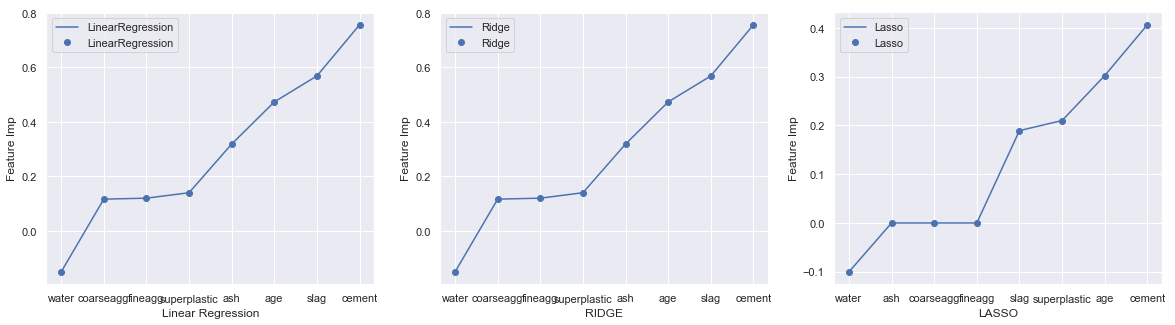

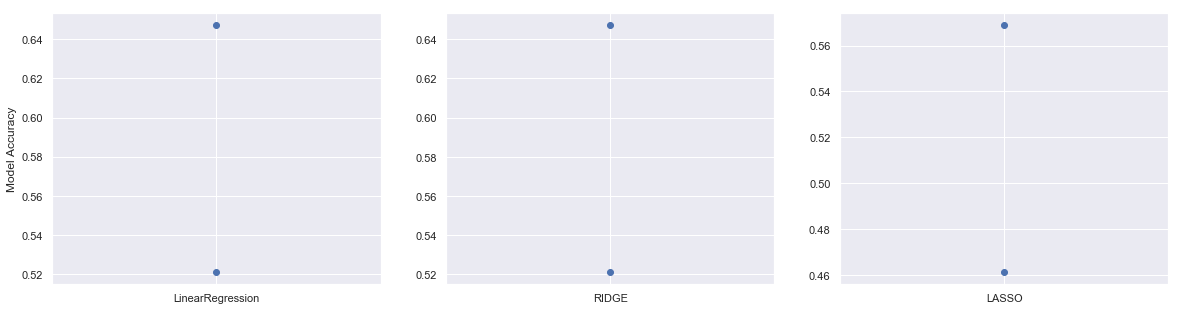

In [157]:
plotImpFeatures()
plotModels()

### Beyond PolynomialFeatures(degree >2) models does'nt perform well on Test set. From this it is clear that the model is non linear. Thus we proceed to other non-linear models. Over fitting concluded here

2

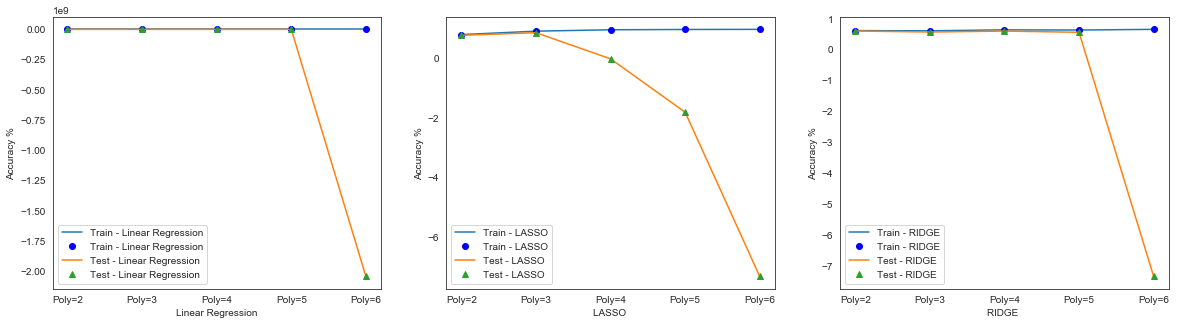

In [89]:
plotAccModels()

##  DecisionTreeRegressor
###  There is a overfitting in the model as the dataset is performing ~97% accurately in trainnig data . However, the accuracy on Test data drops to ~77%.
### AGE > CEMENT > SUPERPLASTIC > WATER >SLAG are IMPORTANT features as per Decision Tree
### 95% confidence interval is between 75.3% and 76.4%

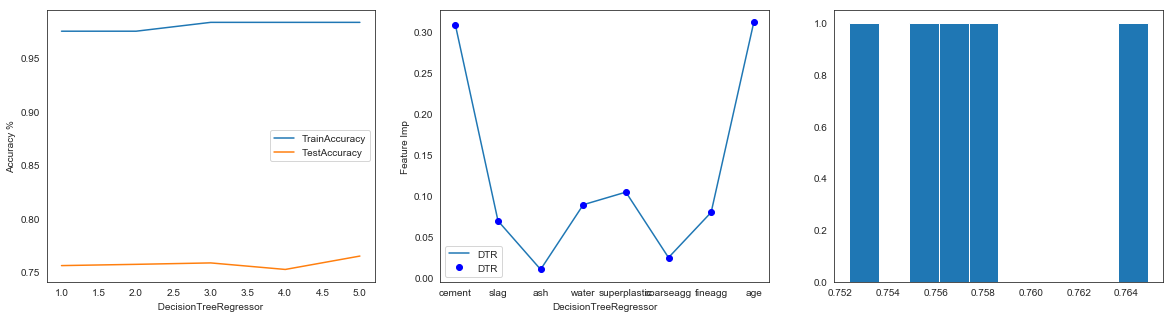

95.0 confidence interval 75.3% and 76.4%


C:\Users\Ah0183909\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


2

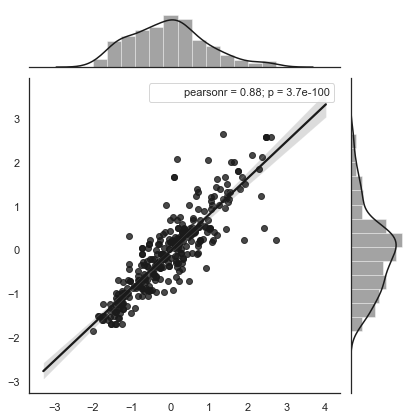

In [90]:
plotDTR()

##   AdaBoostRegressor
###  This model is also an overfit with  ~83% accurately in trainnig data . However, the accuracy on Test data drops to ~77%.
### 95% confidence interval is between 76.6% and 78.4%

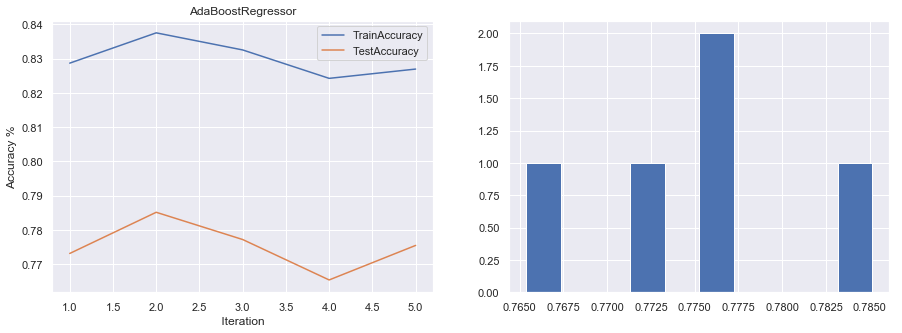

95.0 confidence interval 76.6% and 78.4%


In [91]:
plotAdaBst()

## RANDOM FOREST Regressor
###  This model is also an overfit with  ~85% accurately in trainnig data . However, the accuracy on Test data drops to ~77%.
### 95% confidence interval is between 74.0% and 80.0%

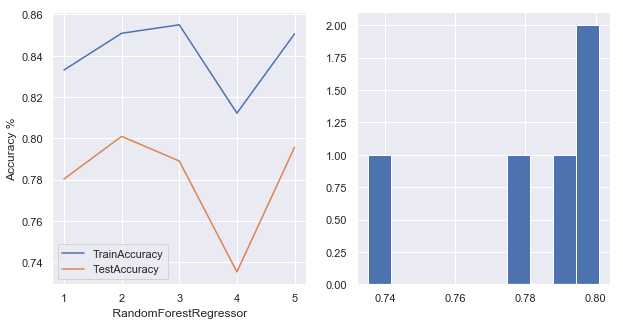

95.0 confidence interval 74.0% and 80.0%


In [159]:
plotRanFor()

## Gradient Boosting Regressor
###  Model has  ~98% accurately in trainnig data with Test accuracy ~94%
### 95% confidence interval is between is between 93.5% and 94.0%

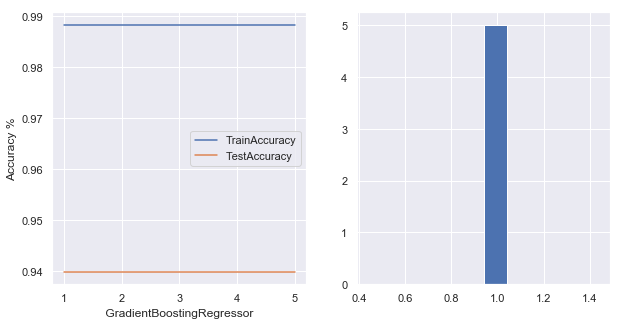

95.0 confidence interval 94.0% and 94.0%


In [164]:
plotGrad()

## The bootstrap Random Forest classification model performance is stable & between 84%-90.8%, with 95% confidence interval is between 74.0% and 80.0% ,which is better than other regression algorithms. Gradient boosting also a good contender with very very stable HIGH predictions !!!!